<a href="https://colab.research.google.com/github/Cristiano1120/datascience/blob/main/MVP_2_Partes_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPRINT 2 - MVP PARTE 1 - PROBLEMA DE CLASSIFICAÇÃO**

Aluno: Cristiano Rodrigues Marques

Segundo as informações obtidas no **UCI Machine Learnig** :

1.1. - **Definição do Problema**

O objetivo da pesquisa é ajudar os auditores a construir um modelo de classificação que possa prever a empresa fraudulenta com base nos fatores de risco atuais e históricos.

1.2. **Premissas ou hipóteses sobre o problema**

Tendo em vista a analise dos dados, há a possibilidade de algumas hípoteses sobre o apredizado:

* Verificar se o préprocessamento se mostra sufuciente para avaliar o potencial de haver em uma empresa fraude ou não;

* Verificar se as métricas de havaliação favorecem para aceitar a hipótese.


1.3.**Que restrições ou condições foram impostas para selecionar os dados?**

* Ao listar todos os atributos verificou-se que o atributo LOCATION_ID tem como tipo object, ou seja, não está definido.

* optou-se por não aplicar um estratégia de desbalanciamneto pois para remover registros da classe maior e inserir na classe menor, pode ajustar o problema. Entretando, removendo registros tem a possibilidade de perder informações relevantes e inserindo valores no caso da classe menor pode haver a insersão de valores repetidos o que pode causar overffintig dependendo do grau de desbalanciamento da base.


1.4 **Descrição da Base**


As informações sobre os setores e as contagens de empresas são listadas e traduzidas conforme respectivamente como Irrigação (114), Saúde Pública (77), Edificações e Estradas (82), Floresta (70), Corporativa (47), Pecuária (95), Comunicação ( 1), Elétrica (4), Terra (5), Ciência e Tecnologia (3), Turismo (1), Pescas (41), Indústrias (37), Agricultura. Dessa forma, o sector_score é o indice que descreve o grau de quanto um setor pode apresentar empresas com risco de incorrenrem em fraudes.

Sector_score: Pontuação do setor, que representa uma medida de risco do setor em que a empresa opera.

* LOCATION_ID: Identificador da localização ou distrito.

* PARA_A: Valor dos ajustes de auditoria (nível A).

* Score_A: Pontuação dos ajustes de auditoria (nível A).

* Risk_A: Risco associado aos ajustes de auditoria (nível A).

* PARA_B: Valor dos ajustes de auditoria (nível B).

* Score_B: Pontuação dos ajustes de auditoria (nível B).

* Risk_B: Risco associado aos ajustes de auditoria (nível B).

* TOTAL: Valor total dos ajustes de auditoria (nível A + nível B).

* numbers: Número de valores detectados em uma revisão.

* Score_B: Pontuação dos valores detectados em uma revisão.

* Risk_C: Risco associado aos valores detectados em uma revisão.

* Money_Value: Valor total de dinheiro envolvido em transações ou revisões.

* Score_MV: Pontuação do valor de dinheiro.

* Risk_D: Risco associado ao valor de dinheiro.

* District_Loss: Risco associado a perdas no distrito.

* PROB: Risco associado à probabilidade de ocorrência de eventos.

* RiSk_E: Risco associado a eventos.

* History: Histórico da empresa.

* Prob: Risco associado à probabilidade.

* Risk_F: Risco associado.

* Score: Pontuação geral.

* Inherent_Risk: Risco inerente da empresa.

* CONTROL_RISK: Risco de controle da empresa.

* Detection_Risk: Risco de detecção.

* Audit_Risk: Risco de auditoria.

* Risk: Variável alvo que representa a classificação do risco, normalmente binária (1 - risco alto, 0 - risco baixo).


* Nº de linhas: 777
* Nº de atributos: 27


# Preparação dos dados:

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Carregando o Dataset Audit Risks

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Cristiano1120/datascience/main/audit_risk.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
0           0.4             0.5      1.7148     1  
1           0.4             0.5      0.5108     0  
2           0.4             0.5      0.3096     0  
3           0.4             0.5      3.5060     1  
4           0.4             0.5      0.2832     0  

[5 rows x 27 columns]

A primeira vista os primeiros registros da tabela acima, apresentam atributos com informações do tipo Float64 ou int64. A seguir será descrito os tipos de todo o conjunto de dados.

In [ ]:
#Descrição dos atributos e de seus respectivos tipos
dataset.dtypes
print(dataset.shape)

(776, 27)


Ao listar todos os atributos verificou-se que o atributo LOCATION_ID tem como tipo object, ou seja, não está definido. Sendo assim, é necessário realizar uma limpeza dos dados antes de realizar a inferência estatistica

In [ ]:
# Verificando quais valores da coluna Location_ID não são dígitos
cont = 45
for index, row in dataset.iterrows():
    if not row['LOCATION_ID'].isdigit():
        print("id: " + str(index) + ", row: " + row['LOCATION_ID'])
        dataset.loc[index,'LOCATION_ID'] = cont
        cont += 1

id: 351, row: LOHARU
id: 355, row: NUH
id: 367, row: SAFIDON


In [ ]:
#Convertendo coluna Location_ID para int64
dataset["LOCATION_ID"] = pd.to_numeric(dataset["LOCATION_ID"])

#apresentando atributos e seus respectivos tipos depois da remoção dos registros Location_ID(LOHARU,NUH,SAFIDON)
dataset.dtypes

Sector_score      float64
LOCATION_ID         int64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [ ]:
#verificando valores nulos
dataset.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

. Os resultados apontam apenas um valor ausente(ou nulo) no atributo Money_Value, como demonstrado acima.

Tendo em vista que que o tamanho da base de dados (777) optou-se por não aplicar um estratégia de desbalanciamneto pois para remover registros da classe maior e inserir na classe menor, pode ajustar o problema. Entretando, removendo registros tem a possibilidade de perder informações relevantes e inserindo valores no caso da classe menor pode haver a insersão de valores repetidos o que pode causar overffintig dependendo do grau de desbalanciamento da base.

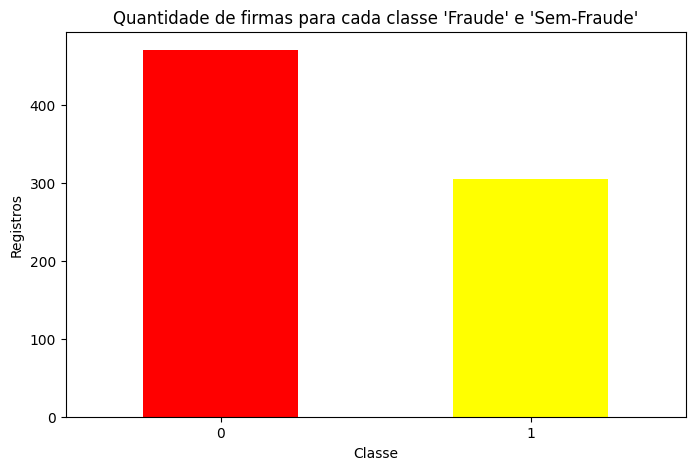

In [ ]:
#Quantidade de registros para cada classe (Fraude e Sem-Fraude)
dataset['Risk'].value_counts().head(777).plot(kind='bar',
                                              figsize=(8,5),
                                              grid=False,
                                              rot=0,
                                              color=['red','yellow'])

#Definindo legendas do gráfico
plt.title("Quantidade de firmas para cada classe 'Fraude' e 'Sem-Fraude'")
plt.xlabel("Classe")
plt.ylabel("Registros")
plt.show()

**Tratando valores nulos com inputation nos dados sem contar o atributo classe**

In [ ]:
#Substituir o valor desconhecido pela média

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:,:-1])
dataset.iloc[:,:-1] = imputer.transform(dataset.iloc[:,:-1])

**Criação e avaliação de modelos: linha base**

In [ ]:
#Normalizando bases
scaler = MinMaxScaler().fit(dataset.iloc[:,:-1])
dataset.iloc[:,:-1] = scaler.transform(dataset.iloc[:,:-1])

np.set_printoptions(precision=3)

In [ ]:
#Apresentação de uma amostra dos dados normalizados
dataset.head()

Sector_score  LOCATION_ID    PARA_A  Score_A    Risk_A    PARA_B  Score_B  \
0      0.035172     0.478261  0.049176      1.0  0.049176  0.001977      0.0   
1      0.035172     0.108696  0.000000      0.0  0.000000  0.003819      0.0   
2      0.035172     0.108696  0.006000      0.0  0.002000  0.000182      0.0   
3      0.035172     0.108696  0.000000      0.0  0.000000  0.008540      1.0   
4      0.035172     0.108696  0.000000      0.0  0.000000  0.000063      0.0   

     Risk_B     TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  \
0  0.000659  0.005264     0.00  ...     0.0      0.0   0.0     0.0  0.125   
1  0.001273  0.003806     0.00  ...     0.0      0.0   0.0     0.0  0.000   
2  0.000061  0.000583     0.00  ...     0.0      0.0   0.0     0.0  0.000   
3  0.008540  0.008511     0.25  ...     0.0      0.0   0.0     0.0  0.750   
4  0.000021  0.000063     0.00  ...     0.0      0.0   0.0     0.0  0.000   

   Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
0       0.008969           0.0             0.0    0.001493     1  
1       0.001443           0.0             0.0    0.000240     0  
2       0.000185           0.0             0.0    0.000031     0  
3       0.020166           0.0             0.0    0.003356     1  
4       0.000020           0.0             0.0    0.000003     0  

[5 rows x 27 columns]

Realizarei a técnica de Feature Select para reduzir atributos reduntes ou irrelevante, pois alguns olgaritimos não trabalham bem com esse tipo de dados. Nesta técnica aplicada um correlação afim de separar o dados mais relevantes ao tipo de problema, utilizando como target atributos correlatos maiores ou iguais 0.4.

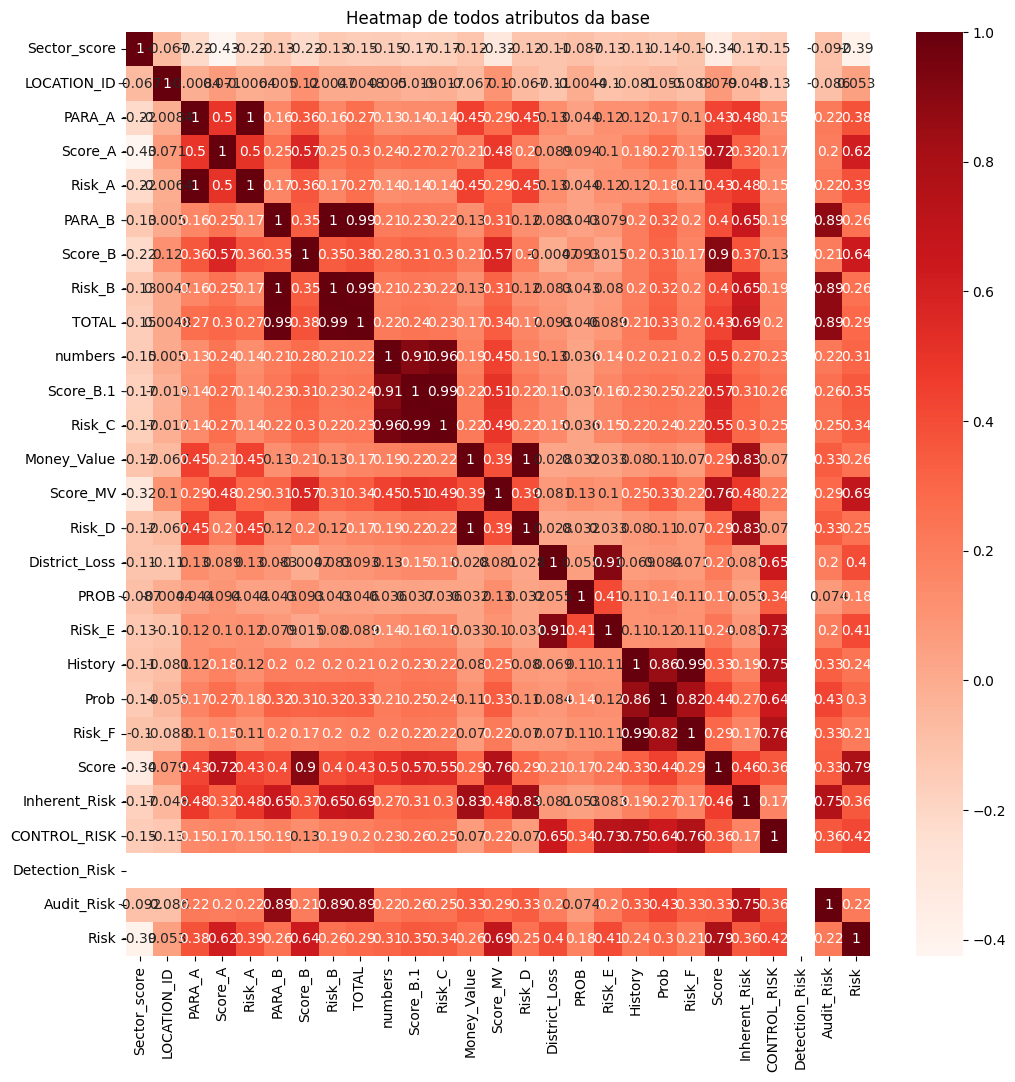

Score_A          0.619726
Score_B          0.635768
Score_MV         0.688367
District_Loss    0.403806
RiSk_E           0.411803
Score            0.785995
CONTROL_RISK     0.416474
Risk             1.000000
Name: Risk, dtype: float64

In [ ]:
# Medindo a correlação dos atributos com o atributo classe 'Risk'
# e utilizando o mapa de calor baseado na correlação de Pearson para visualizar os dados correlatos
plt.figure(figsize=(12,12))
plt.title("Heatmap de todos atributos da base")
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["Risk"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.4]
relevant_features

Após a seleção dos principais atributos correlacionados ao atributo classe, utilizaremos um heatmap para verificar o nivel de correlação em relação a classe, conforme a seleção dos atributos.

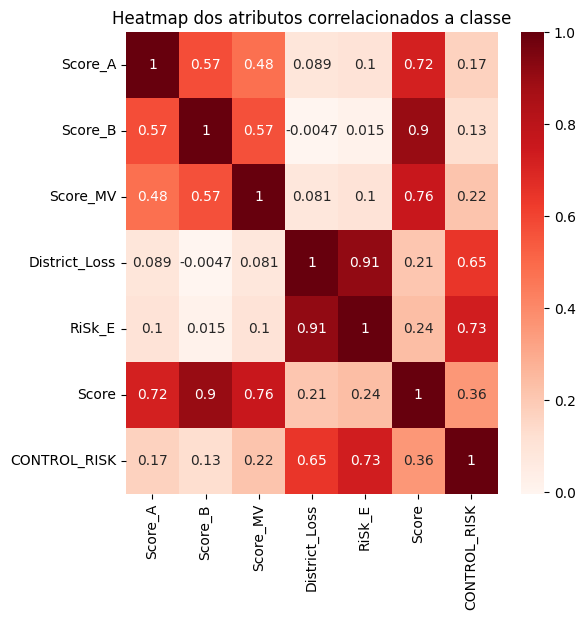

                Score_A   Score_B  Score_MV  District_Loss    RiSk_E  \
Score_A        1.000000  0.572655  0.478876       0.088662  0.102677   
Score_B        0.572655  1.000000  0.567591      -0.004654  0.015324   
Score_MV       0.478876  0.567591  1.000000       0.081098  0.104434   
District_Loss  0.088662 -0.004654  0.081098       1.000000  0.913477   
RiSk_E         0.102677  0.015324  0.104434       0.913477  1.000000   
Score          0.720488  0.901276  0.758327       0.210530  0.237008   
CONTROL_RISK   0.170872  0.127827  0.217455       0.645127  0.729845   

                  Score  CONTROL_RISK  
Score_A        0.720488      0.170872  
Score_B        0.901276      0.127827  
Score_MV       0.758327      0.217455  
District_Loss  0.210530      0.645127  
RiSk_E         0.237008      0.729845  
Score          1.000000      0.356741  
CONTROL_RISK   0.356741      1.000000  


In [ ]:
# Correlação entre os atributos correlacionados com o atributo classe
plt.figure(figsize=(6,6))
plt.title("Heatmap dos atributos correlacionados a classe")
sns.heatmap(dataset[["Score_A","Score_B","Score_MV", "District_Loss", "RiSk_E", "Score", "CONTROL_RISK"]].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()
print(dataset[["Score_A","Score_B","Score_MV", "District_Loss", "RiSk_E", "Score", "CONTROL_RISK"]].corr())

Conforme o gráfico acima o atributo Score apresenta forte correlação com todos os outros atributos, desta forma ele será removido do conjunto final de atributos para evitar:
 * Redução da redundância (A presença de atributos altamente correlacionados pode levar a uma redundância de informações no conjunto de dados,...);
 * Redução do tempo de processamento (A presença de muitos atributos altamente correlacionados pode aumentar o tempo de treinamento e previsão dos modelos. Ao remover atributos correlacionados, o conjunto de dados se torna mais leve e o processo de treinamento pode ser mais rápido.);
 * Evitar multicolinearidade (Em algumas técnicas de modelagem, como a regressão linear, a multicolinearidade (alta correlação entre os atributos independentes) pode afetar negativamente a precisão dos coeficientes de regressão e tornar as inferências menos confiáveis.);
 * Aumentar a robustez (A remoção de atributos altamente correlacionados pode melhorar a robustez do modelo, tornando-o menos sensível a pequenas variações nos dados de entrada).

 Na seleção de atributos se busca atributos independentes entre si e bem correlacionados com a clase excluindo o atributo Score os demais tem forte correlação com a clase. Entretanto, entre si não tanto.

In [ ]:
# Agora removemos o atributo Score e deixamos a base final com os seguintes atributos:

base_end = dataset[["Score_A","Score_B","Score_MV", "District_Loss", "RiSk_E", "CONTROL_RISK", "Risk"]]
base_end.head()

Score_A  Score_B  Score_MV  District_Loss  RiSk_E  CONTROL_RISK  Risk
0      1.0      0.0       0.0            0.0     0.0           0.0     1
1      0.0      0.0       0.0            0.0     0.0           0.0     0
2      0.0      0.0       0.0            0.0     0.0           0.0     0
3      0.0      1.0       1.0            0.0     0.0           0.0     1
4      0.0      0.0       0.0            0.0     0.0           0.0     0

**Modelagem e Inferência**

In [ ]:
# Converter o array em um DataFrame do pandas
columns = ['Score_A', 'Score_B', 'Score_MV', 'District_Loss', 'RiSk_E', 'CONTROL_RISK', 'Risk']
df = pd.DataFrame(data=base_end, columns=columns)

# Definir as colunas de atributos (X) e a coluna de classe (y)
X = df.drop(columns=['Risk']).values
y = df['Risk'].values

# Restante do código continua igual
test_size = 0.20
seed = 8

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

LR: 0.954839 (0.024778)
KNN: 0.943548 (0.021938)
CART: 0.959677 (0.025246)
NB: 0.911290 (0.050104)
SVM: 0.951613 (0.024987)
Bagging: 0.962903 (0.021699)
RF: 0.958065 (0.023037)
ET: 0.959677 (0.020718)
Ada: 0.961290 (0.020655)
GB: 0.964516 (0.018810)
Voting: 0.954839 (0.022581)


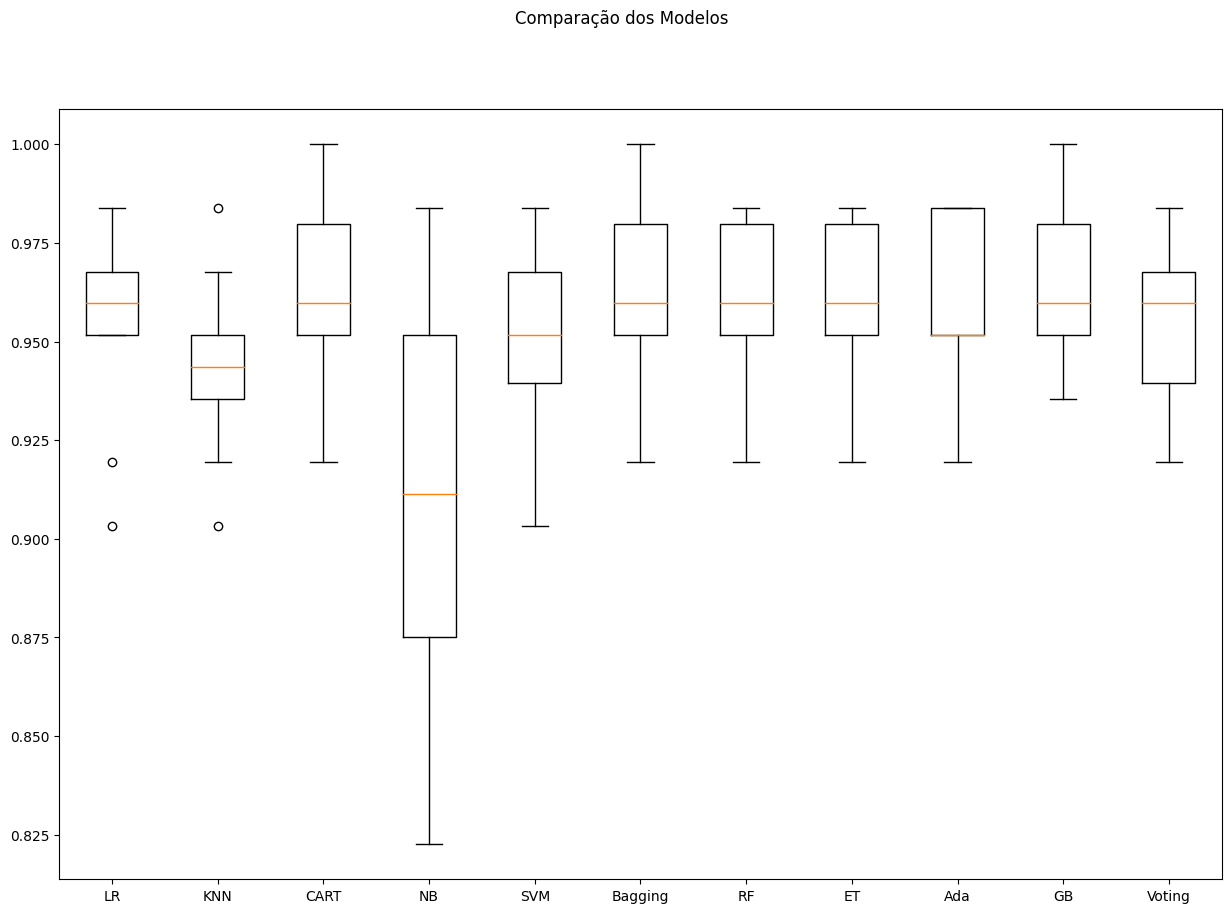

In [ ]:
np.random.seed(8) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-orig: 0.955 (0.025)
KNN-orig: 0.944 (0.022)
CART-orig: 0.960 (0.025)
NB-orig: 0.911 (0.050)
SVM-orig: 0.952 (0.025)
Bag-orig: 0.963 (0.022)
RF-orig: 0.958 (0.023)
ET-orig: 0.960 (0.021)
Ada-orig: 0.961 (0.021)
GB-orig: 0.965 (0.019)
Vot-orig: 0.955 (0.023)
LR-padr: 0.960 (0.023)
KNN-padr: 0.953 (0.028)
CART-padr: 0.960 (0.025)
NB-padr: 0.911 (0.050)
SVM-padr: 0.955 (0.025)
Bag-padr: 0.960 (0.025)
RF-padr: 0.961 (0.023)
ET-padr: 0.960 (0.021)
Ada-padr: 0.961 (0.021)
GB-padr: 0.965 (0.019)
Vot-padr: 0.958 (0.023)
LR-norm: 0.955 (0.025)
KNN-norm: 0.944 (0.022)
CART-norm: 0.960 (0.025)
NB-norm: 0.911 (0.050)
SVM-norm: 0.953 (0.025)
Bag-norm: 0.960 (0.025)
RF-norm: 0.961 (0.019)
ET-norm: 0.960 (0.021)
Ada-norm: 0.961 (0.021)
GB-norm: 0.965 (0.019)
Vot-norm: 0.956 (0.024)


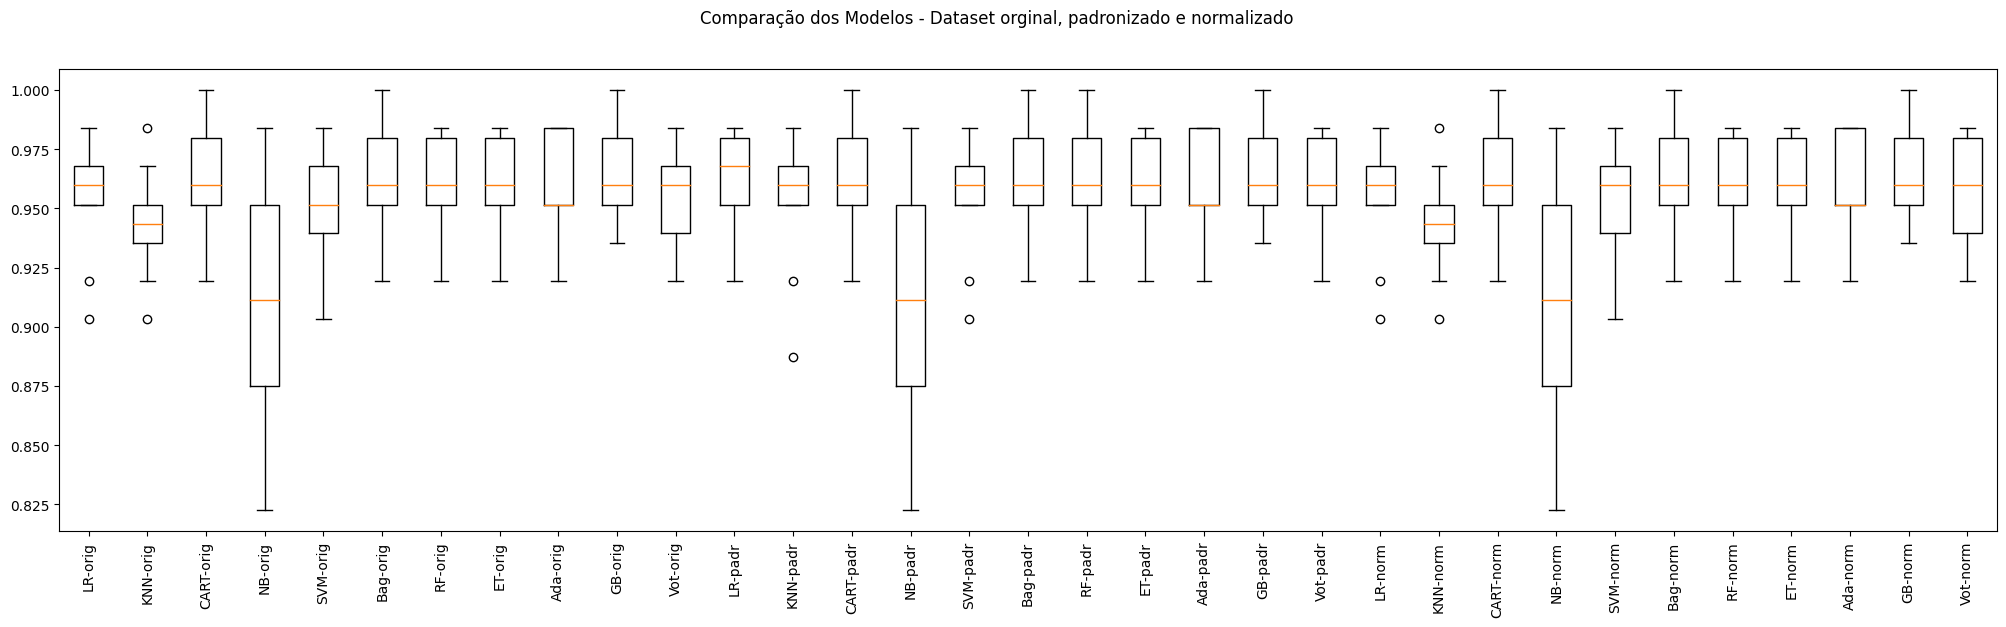

In [ ]:
np.random.seed(8) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do KNN

np.random.seed(8) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.958065 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.961290 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}
Sem tratamento de missings: knn-norm - Melhor: 0.958065 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}


O resultado indica que a melhor configuração encontrada e a distancia euclidiana e K= 11.

**Finalização do Modelo e Avaliação**

Neste momento irei executar a otimização dos hiperparâmetros utilizando o GradientBoostingClassifier o qual gerou melhor resultado tando para a acurácia quanto para o Desvi Padrão utilizando a bibliotéca Grid Search. Anteriormente acima, foi utilizado a mesma métrica  de valores impares apresentados no exemplo da aula 3, o qual tentou utilizar os valores ímpares de k entre 1 e 21 e as métricas de distância euclidiana, manhattan e minkowski. Cada valor de k e de distância será avaliado usando a validação cruzada 10-fold no conjunto de dados padronizado, que mostrou resultados um pouco melhores do que os dados originais.

In [ ]:

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(n_estimators=500) # substituição de max_iter por n_estimators
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9743589743589743


Accuracy score =  0.9743589743589743


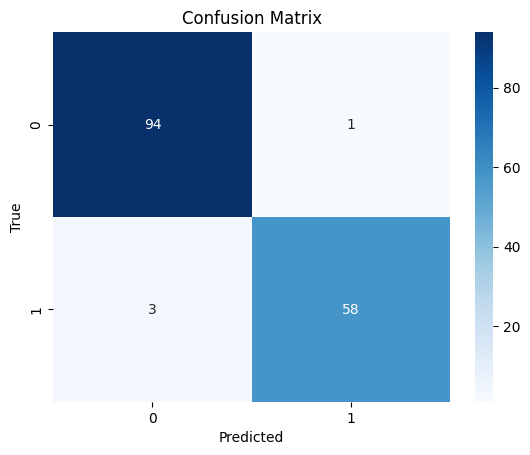

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.95      0.97        61

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [ ]:
# Preparação do modelo
model = GradientBoostingClassifier(n_estimators=500)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print('Accuracy score = ', accuracy_score(y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Plotagem da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predictions))

Por meio do conjunto de teste, verificamos que nosso modelo alcançou uma acurácia impressionante de 97% em dados não vistos. Esse resultado superou até mesmo a avaliação anterior de outros modelos que obtiveram uma acurácia média de 96%. Esses resultados destacam a robustez e a eficácia do nosso modelo de classificação.

A alta acurácia de teste nos deixa confiantes de que nosso modelo está generalizando bem para dados desconhecidos, o que é essencial para sua utilização em ambientes de produção. Podemos esperar valores semelhantes de acurácia quando o modelo estiver em execução, realizando previsões para novos dados em cenários reais.

A precisão de 97% mostra que o modelo está identificando corretamente a maioria das instâncias positivas e negativas. Além disso, o recall de 95% indica que ele está capturando a grande maioria das instâncias verdadeiramente positivas.

Esses resultados validam a qualidade do nosso modelo de classificação e nos permitem usá-lo de forma confiante em diversas aplicações, como na detecção de fraudes, análise de sentimentos e muito mais.

A seguir iremos preparar o modelo para a utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

In [ ]:
# Preparação do modelo com todo o Datase
scaler = StandardScaler().fit(X) # Ajuste do scaler com todo o dataset
rescaledX = scaler.transform(X) # Aplicação da padronização com todo o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier(n_estimators=500)

**Simulando a aplicação do modelo em dados não vistos:**

Realizando a aplicação do modelo em dados não vistos, acrescentando três novas instâncias, sem saber a clase de saída. Poderemos, então, aplicar nosso modelo recém-treinado para fazer a predição das classes.

In [ ]:
# Novos dados - não sabemos a classe!
data = { 'Score_A':  [1, 9, 5],
        'Score_B': [90, 100, 110],
        'Score_MV': [50, 60, 50],
        'District_Loss': [30, 30, 30],
        'District_Loss': [100, 100, 100],
        'RiSk_E': [20.0, 30.0, 40.0],
        'CONTROL_RISK': [1.0, 2.0, 1.0],
        'Teste': [1.5, 2.5, 1.5],
        'Config': [2.5, 3.5, 4.5],
         'Mala': [88, 99, 77],
         'Risks': [0, 0, 1],
         }

atributos = ['Score_A', 'Score_B', 'Score_MV', 'District_Loss', 'RiSk_E', 'CONTROL_RISK', 'Test', 'Config', 'Mala', 'Risks']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[  1.43  211.479 124.71  325.352 137.461  11.765]
 [ 19.827 235.051 149.766 325.352 206.397  23.92 ]
 [ 10.628 258.622 124.71  325.352 275.333  11.765]]


**Predição das classes para os novos dados:**

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 1]


# **SPRINT 2 - MVP PARTE 2 - Deep Learning**

Segundo as informações obtidas: https://www.kaggle.com/datasets/denisleu/facial-expressions-happiness-sadness-surprise :


1.1. - Definição do Problema

Este conjunto de dados contém três pastas, Happy, Sad e Angry. Cada pasta contém cerca de 100 imagens de cada expressão mencionada. Você pode usar esse conjunto de dados para várias finalidades, incluindo classificação usando redes neurais convolucionais e visão computacional.



1.2. Premissas ou hipóteses sobre o problema

Para a parte dois desse MVP o dataset utilizado será o *"Human Face Emotions"* o qual possui originalmente três instâncias. O conjunto de dados contém imagens de rostos humanos com emoções felizes, tristes e surpresas (Separadas em três diretórios), e para este modelo optou-se em utilizar todas as instancias emoções humanas tristes e felizes e surpresos.



1.3.Que restrições ou condições foram impostas para selecionar os dados?

Por motivos de tempo, não foi possivél finalizar o modelo com indicadores mais aprópriados.

1.4 Descrição da Base

Um arquivo zip compactado contendo imagens de trem e teste representando 3 expressões faciais humanas: felicidade, tristeza e surpresa. As imagens foram coletadas online para a dissertação de mestrado, são RGB e no formato jpg. Existem diferentes resoluções, sendo a menor 60x60.

# Preparação dos dados:

In [ ]:
# Utilizar o Google Drive
!pip install gdown
import gdown
from google.colab import drive

# Acessar e manipular arquivos e diretórios / sistema operacional
import os
import shutil
import zipfile
import random # Gerar números aleatórios
import math # Realizar operações matemáticas
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools # Iteradores

# Matriz de confusão e outras métricas de avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# keras = pré-processamento de imagens, camadas para modelos convolucionais, modelos e otimizadores de parâmetros
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image

# Realizar divisão entre treino e teste
from sklearn.model_selection import train_test_split

# Exibir as imagens
from IPython.display import Image as ipimg

**Importação do Dataset**

https://drive.google.com/file/d/1HQZW-P-sa67KPYWi52Pp921z9-JT2mlS/view?usp=drive_link

In [ ]:
# File_id do Google Drive
file_id = "1BFnfy_2zF7l3W-OxHiYQgMmtC7dQRB5z"

# URL do arquivo a ser baixado
url = f"https://drive.google.com/uc?id={file_id}"

# Pasta onde o arquivo será baixado
folder_path = "."  # Diretório atual como a pasta de destino
os.makedirs(folder_path, exist_ok=True)  # Cria a pasta de destino se necessário

# Nome e extensão do arquivo de saída
output = "/archive.zip"

# Baixar o arquivo ZIP usando gdown
gdown.download(url, output, quiet=False)

# Verificar se o arquivo ZIP foi baixado corretamente
if not os.path.exists(output):
    raise FileNotFoundError("O arquivo ZIP não foi baixado corretamente.")

# O arquivo ZIP foi baixado com sucesso!
print("Arquivo ZIP baixado com sucesso!")

Downloading...
From: https://drive.google.com/uc?id=1BFnfy_2zF7l3W-OxHiYQgMmtC7dQRB5z
To: /archive.zip
100%|██████████| 66.6M/66.6M [00:02<00:00, 25.5MB/s]

Arquivo ZIP baixado com sucesso!


In [ ]:
# Especificando o diretório onde as pastas e arquivos rotulados serão armazenados, tanto para teste quanto para treino
destination = '.'

# Cria a pasta de destino se ainda não existir
os.makedirs(destination, exist_ok=True)

# Descompactando o arquivo ZIP baixado
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(destination)

In [ ]:
# O Dataset já se encontra com as divisões de treino e teste bastanto apenas direcionalos ao modelo
train_dir = 'Face Expressions (Happy, Sad, Surprise)/train'
test_dir = 'Face Expressions (Happy, Sad, Surprise)/test'

Neste código, estou explorando o conjunto de dados que contém imagens de diferentes expressões faciais (happy, sad e surprise). Primeiro, coletamos os caminhos de cada arquivo de imagem em todas as classes de treinamento e teste. Em seguida, extraímos os nomes das classes a partir dos caminhos completos dos arquivos. Finalmente, contamos o número de ocorrências de cada classe e exibimos um gráfico de barras para visualizar a distribuição das classes no conjunto de dados

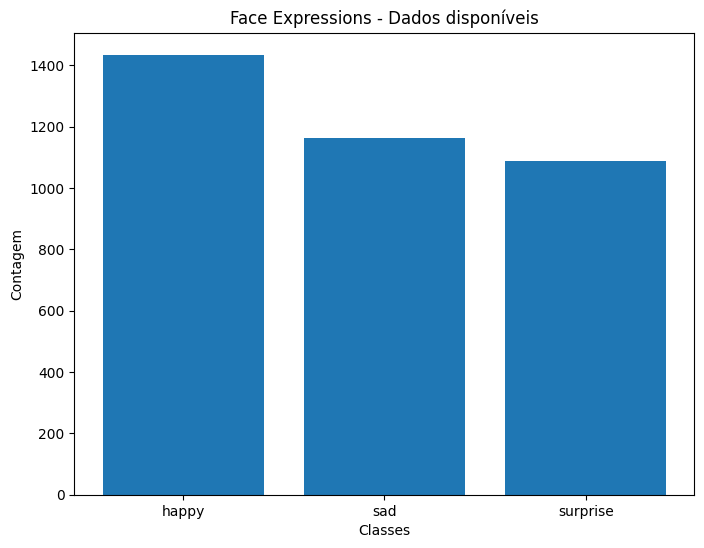

In [ ]:
# Lista contendo os caminhos dos diretórios de treinamento e teste para cada classe de expressões faciais
paths = [
    'Face Expressions (Happy, Sad, Surprise)/train/happy/',
    'Face Expressions (Happy, Sad, Surprise)/train/sad/',
    'Face Expressions (Happy, Sad, Surprise)/train/surprise/',
    'Face Expressions (Happy, Sad, Surprise)/test/happy/',
    'Face Expressions (Happy, Sad, Surprise)/test/sad/',
    'Face Expressions (Happy, Sad, Surprise)/test/surprise/'
]

# Lista para armazenar os caminhos completos de todos os arquivos de imagem em todas as classes
filepaths = []

# Percorre cada diretório para obter a lista de nomes de arquivo de imagem em cada classe
for path in paths:
    imagens = os.listdir(path)

    # Concatena o caminho do diretório com o nome de cada arquivo de imagem para obter o caminho completo do arquivo
    for fname in imagens:
        file_path = os.path.join(path, fname)
        filepaths.append(file_path)

# Extrai o nome da classe (happy, sad ou surprise) de cada caminho completo de arquivo
classes = [os.path.basename(os.path.dirname(filepath)) for filepath in filepaths]

# Conta o número de ocorrências de cada classe
class_counts = dict((class_, classes.count(class_)) for class_ in set(classes))

# Plota o gráfico de barras para visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Face Expressions - Dados disponíveis')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()

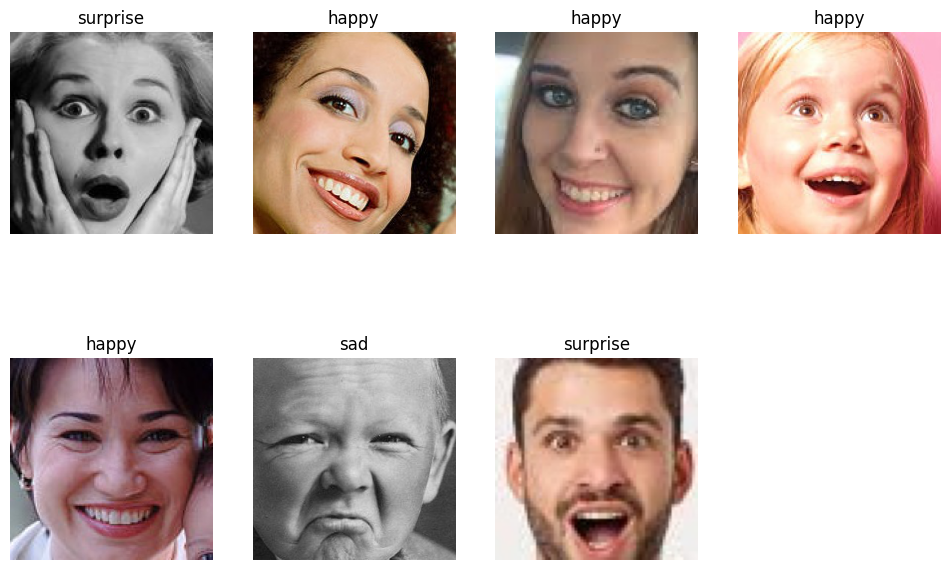

In [ ]:
# Define o tamanho da figura para 3x4 polegadas
fig = plt.gcf()
fig.set_size_inches(3 * 4, 3 * 4)

# Visualiza aleatoriamente 7 imagens
for i in range(7):
    # Escolhe aleatoriamente um caminho de arquivo de imagem da lista de caminhos (filepaths)
    sample = np.random.choice(filepaths)

    # Cria um subplot 3x4 para a imagem atual
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')  # Não mostra os eixos (axis) na imagem

    # Lê a imagem usando o caminho de arquivo selecionado
    imagem_exemplo = mpimg.imread(sample)

    # Exibe a imagem no subplot atual
    plt.imshow(imagem_exemplo)

    # Extrai o nome da classe a partir do caminho do arquivo
    class_name = sample.split('/')[-2]  # Obtém a penúltima parte do caminho (nome da classe)
    plt.title(class_name)  # Define o nome da classe como título do subplot

plt.show()

Neste trecho de código, estamos visualizando aleatoriamente oito imagens do conjunto de dados de expressões faciais.

Para cada imagem, foi selecionado aleatoriamente um caminho de arquivo de imagem da lista filepaths. Em seguida, lemos a imagem usando o caminho selecionado e a exibimos em um subplot 3x4.

O nome da classe é extraído do caminho do arquivo e é usado como título para cada subplot, identificando a classe correspondente da imagem.

O resultado é uma grade de 3x4 com 8 imagens aleatórias de expressões faciais, onde o título de cada imagem corresponde à classe a que ela pertence.

 **Pré processamento com classificação de imagens com redes neurais convolucionais.**

* batch_size controla o número de amostras que serão propagadas através da rede antes que os gradientes sejam atualizados;

* img_height e img_width definem as dimensões para redimensionar as imagens antes de alimentá-las na rede;

* num_classes indica o número total de classes em um problema de classificação.

Essas informações são úteis para configurar a entrada e saída adequadas para um modelo de rede neural em tarefas de classificação de imagens, como a classificação de expressões faciais neste caso.

In [ ]:
# Tamanho do lote (batch size) é o número de amostras que serão processadas em cada etapa do treinamento
batch_size = 32

# Altura das imagens após o redimensionamento para a entrada da rede neural
img_height = 224

# Largura das imagens após o redimensionamento para a entrada da rede neural
img_width = 224

# Número de classes no conjunto de dados, que corresponde às seguintes classes: "Happy", "Sad" e "Surprise"
num_classes = 3

Tarefas de classificação de imagens usando redes neurais convolucionais. O ImageDataGenerator do Keras é usado para criar geradores que processam automaticamente os dados de treinamento e teste, aplicando transformações de dados, como redimensionamento, rotação, cisalhamento, entre outros.

Os geradores criados fornecerão lotes (batches) de imagens e seus respectivos rótulos para o treinamento e teste do modelo. O ImageDataGenerator é uma ferramenta poderosa que ajuda a lidar com grandes volumes de dados de imagem e permite o uso eficiente dos dados durante o treinamento do modelo.

In [ ]:
# Configuração do gerador de dados para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # Inclui a divisão de validação, 20% dos dados serão usados para validação
    rescale=1./255,  # Reescala os valores dos pixels das imagens para o intervalo [0, 1]
    shear_range=0.2,  # Aplica corte ou cisalhamento aleatório nas imagens
    zoom_range=0.2,  # Aplica zoom aleatório nas imagens
    horizontal_flip=True,  # Realiza flip horizontal aleatório nas imagens
    rotation_range=180  # Realiza rotação aleatória nas imagens no intervalo de [-180, 180] graus
)

# Configuração do gerador de dados para o conjunto de teste (apenas reescala os valores dos pixels)
test_datagen = ImageDataGenerator(rescale=1./255)

# Criação dos geradores de dados para o treinamento, validação e teste

# Gerador de dados para o conjunto de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Diretório contendo as imagens de treinamento organizadas por classes
    target_size=(img_height, img_width),  # Redimensiona as imagens para o tamanho esperado pelo modelo
    batch_size=batch_size,  # Tamanho do lote (batch size)
    class_mode='categorical',  # Modo de classificação categórica para problemas de classificação multiclasse
    subset='training'  # Subconjunto de treinamento (usado em conjunto com validation_split)
)

# Gerador de dados para o conjunto de validação
val_generator = train_datagen.flow_from_directory(
    train_dir,  # Diretório contendo as imagens de treinamento organizadas por classes
    target_size=(img_height, img_width),  # Redimensiona as imagens para o tamanho esperado pelo modelo
    batch_size=batch_size,  # Tamanho do lote (batch size)
    class_mode='categorical',  # Modo de classificação categórica para problemas de classificação multiclasse
    subset='validation'  # Subconjunto de validação (usado em conjunto com validation_split)
)

# Gerador de dados para o conjunto de teste
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Diretório contendo as imagens de teste organizadas por classes
    target_size=(img_height, img_width),  # Redimensiona as imagens para o tamanho esperado pelo modelo
    batch_size=batch_size,  # Tamanho do lote (batch size)
    class_mode='categorical'  # Modo de classificação categórica para problemas de classificação multiclasse
)

Found 2740 images belonging to 3 classes.
Found 683 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


Neste código, a primeira imagem do lote é selecionada (sample_batch[0][0]) e uma transformação de dados aleatória é aplicada a ela usando o gerador de dados de treinamento (train_datagen.random_transform(foto)). Isso permite visualizar como as transformações de dados afetam a aparência das imagens originais.

O resultado é uma grade de 3x3 com 6 imagens, onde cada imagem é uma versão transformada aleatória da primeira imagem do lote. Essa visualização é útil para verificar como as transformações de dados podem enriquecer o conjunto de treinamento e melhorar a capacidade do modelo de generalizar para diferentes variações de uma mesma imagem.

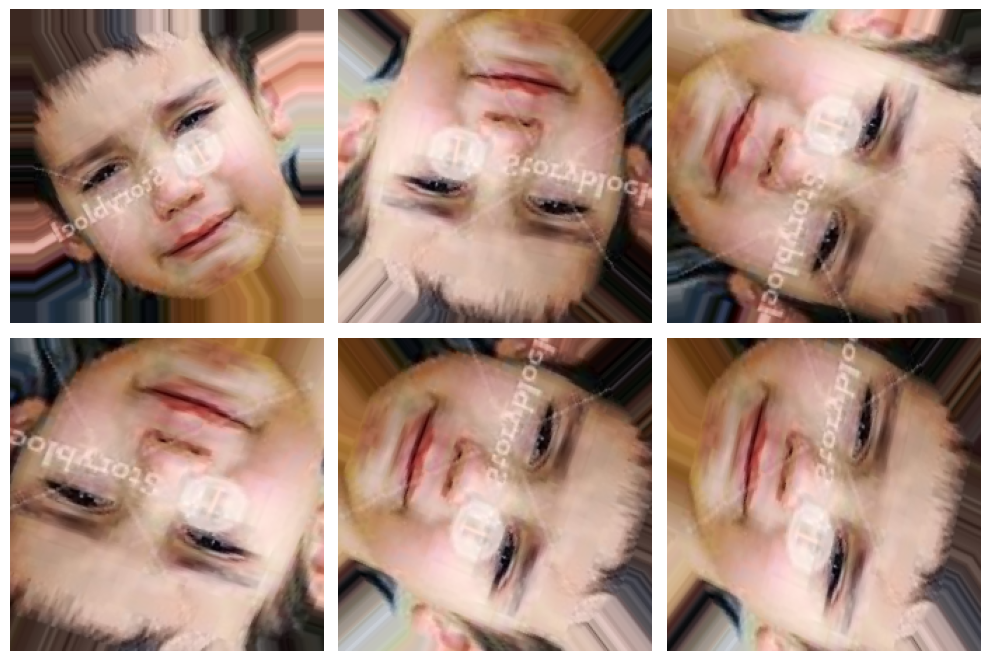

In [ ]:
# Lote de dados do gerador de treinamento (train_generator)
sample_batch = next(train_generator)

# Obtém a primeira imagem e sua respectiva etiqueta (rótulo) do lote
foto = sample_batch[0][0]  # Primeira imagem do lote
label = sample_batch[1][0]  # Etiqueta (rótulo) da primeira imagem do lote

# Cria uma figura para visualização das imagens com o tamanho 10x10 polegadas
plt.figure(figsize=(10, 10))

# Loop para exibir 6 imagens com transformações de dados aleatórias
for i in range(6):
    plt.subplot(3, 3, i+1)  # Cria um subplot 3x3 para cada imagem
    # Aplica uma transformação de dados aleatória na imagem original (foto)
    plt.imshow(train_datagen.random_transform(foto))
    plt.axis('Off')  # Não mostra os eixos (axis) na imagem

# Ajusta o layout dos subplots para evitar sobreposição
plt.tight_layout()

# Exibe a figura com as imagens
plt.show()

A seguir visualizar aleatoriamente 6 imagens do gerador de treinamento (train_generator). Cada imagem é escolhida aleatoriamente a partir do gerador e exibida em uma grade 3x3.

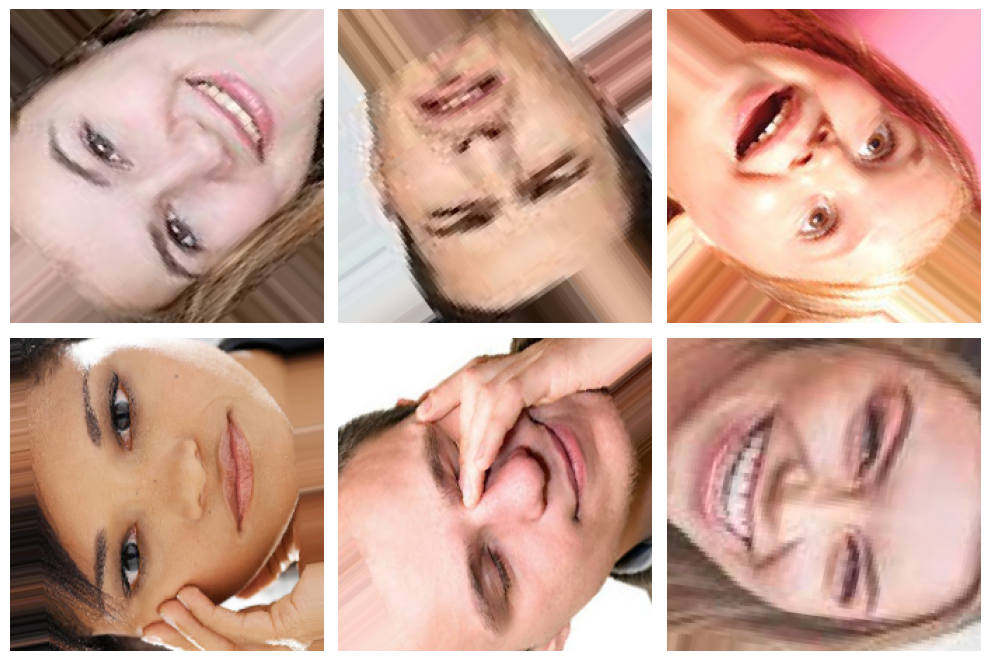

In [ ]:
plt.figure(figsize=(10, 10))

# Loop para exibir 6 imagens aleatórias do gerador de treinamento
for i in range(6):
    plt.subplot(3, 3, i+1)  # Cria um subplot 3x3 para cada imagem

    # Obtém um lote de dados do gerador de treinamento (train_generator)
    for x_batch in random.choice(train_generator):
        foto = x_batch[0]  # Seleciona a primeira imagem do lote (batch)
        plt.imshow(foto)  # Exibe a imagem
        plt.axis('Off')  # Não mostra os eixos (axis) na imagem
        break  # Interrompe o loop após processar um único lote (batch) de dados

# Ajusta o layout dos subplots para evitar sobreposição
plt.tight_layout()

# Exibe a figura com as imagens
plt.show()

O resultado é uma grade 3x3 com 6 imagens aleatórias do gerador de treinamento, permitindo visualizar diferentes exemplos do conjunto de treinamento.
Essa visualização é útil para entender a diversidade das imagens no conjunto de treinamento e verificar como as imagens estão sendo transformadas pelo gerador de dados.

**Treinamento**

Arquitetura de rede neural convolucional (CNN) simples, composta por camadas convolucionais seguidas de camadas de agrupamento (pooling) e camadas densas (totalmente conectadas). Essa arquitetura é comumente usada para tarefas de classificação de imagens.

Cada camada convolucional extrai características relevantes das imagens de entrada. As camadas de agrupamento (pooling) reduzem gradualmente as dimensões espaciais da saída das convoluções, diminuindo o número de parâmetros e preservando as informações importantes.

A camada flatten é usada para transformar o tensor 3D resultante das camadas convolucionais em um vetor 1D, que será alimentado nas camadas densas.

As camadas densas realizam a classificação final, onde a última camada possui o número de neurônios igual ao número de classes (definido como num_classes) e usa a função de ativação softmax para produzir as probabilidades de cada classe para uma imagem de entrada

In [ ]:
# Criação do modelo sequencial
model = keras.models.Sequential([
    # Primeira camada convolucional com 32 filtros de tamanho (3, 3) e função de ativação ReLU
    # input_shape=(img_height, img_width, 3) especifica a dimensão da entrada da rede (altura, largura e canais de cor RGB)
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),

    # Camada de pooling (Agrupamento) para reduzir as dimensões espaciais da saída da primeira convolução
    keras.layers.MaxPooling2D((2, 2)),

    # Segunda camada convolucional com 64 filtros de tamanho (3, 3) e função de ativação ReLU
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Camada de pooling (Agrupamento) para reduzir as dimensões espaciais da saída da segunda convolução
    keras.layers.MaxPooling2D((2, 2)),

    # Terceira camada convolucional com 128 filtros de tamanho (3, 3) e função de ativação ReLU
    keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # Camada de pooling (Agrupamento) para reduzir as dimensões espaciais da saída da terceira convolução
    keras.layers.MaxPooling2D((2, 2)),

    # Quarta camada convolucional com 256 filtros de tamanho (3, 3) e função de ativação ReLU
    keras.layers.Conv2D(256, (3, 3), activation='relu'),

    # Camada de pooling (Agrupamento) para reduzir as dimensões espaciais da saída da quarta convolução
    keras.layers.MaxPooling2D((2, 2)),

    # Transforma o tensor 3D resultante das camadas convolucionais em um vetor 1D
    keras.layers.Flatten(),

    # Camada densa (totalmente conectada) com 256 neurônios e função de ativação ReLU
    keras.layers.Dense(256, activation='relu'),

    # Camada densa (totalmente conectada) com o número de neurônios igual ao número de classes
    # Função de ativação softmax é usada para problemas de classificação multiclasse
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compilação do modelo com múltiplas métricas
model.compile(
    optimizer='adam',  # Algoritmo de otimização 'adam' utilizado para ajustar os pesos da rede
    loss='categorical_crossentropy',  # Função de perda 'categorical_crossentropy' usada para problemas de classificação multiclasse
    metrics=['Accuracy', 'Precision', 'Recall']  # Lista de métricas a serem avaliadas durante o treinamento
)

O otimizador 'adam' é uma técnica popular de otimização baseada em gradiente descendente estocástico, que ajusta os pesos da rede neural durante o treinamento para minimizar a função de perda.

A função de perda 'categorical_crossentropy' é apropriada para problemas de classificação multiclasse, onde cada amostra pode pertencer a apenas uma classe entre várias opções. Essa função mede a discrepância entre as probabilidades previstas pelo modelo e os rótulos verdadeiros, incentivando a rede a fazer previsões mais precisas.

As métricas fornecidas na lista, como 'Accuracy' (acurácia), 'Precision' (precisão) e 'Recall' (revocação), são usadas para avaliar o desempenho do modelo durante o treinamento. A acurácia é uma medida geral da taxa de previsões corretas, enquanto a precisão e a revocação fornecem informações adicionais sobre o desempenho do modelo em relação a cada classe individual.

Essas métricas são úteis para monitorar o desempenho do modelo durante o treinamento e para avaliar sua capacidade de generalização em diferentes classes de expressões faciais.

In [ ]:
epochs = 20  # Número de épocas para o treinamento do modelo

# Treinamento do modelo utilizando o método fit
# O método fit ajusta os pesos da rede neural com base nos dados de treinamento
# e avalia o modelo em dados de validação em cada época.
# A função fit retorna um objeto chamado 'history', que contém informações sobre o treinamento.
history = model.fit(
    train_generator,  # Gerador de dados de treinamento
    epochs=epochs,  # Número de épocas para treinamento
    validation_data=val_generator  # Gerador de dados de validação
)

Epoch 1/20
86/86 [==============================] - 420s 5s/step - loss: 1.1223 - Accuracy: 0.3825 - precision: 0.3608 - recall: 0.0128 - val_loss: 1.0941 - val_Accuracy: 0.3924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
86/86 [==============================] - 420s 5s/step - loss: 1.0839 - Accuracy: 0.3982 - precision: 0.4487 - recall: 0.0128 - val_loss: 1.1148 - val_Accuracy: 0.3763 - val_precision: 0.3692 - val_recall: 0.0703
Epoch 3/20
86/86 [==============================] - 403s 5s/step - loss: 1.0373 - Accuracy: 0.4828 - precision: 0.5790 - recall: 0.1551 - val_loss: 1.3191 - val_Accuracy: 0.3719 - val_precision: 0.3832 - val_recall: 0.2738
Epoch 4/20
86/86 [==============================] - 410s 5s/step - loss: 0.9962 - Accuracy: 0.5150 - precision: 0.6070 - recall: 0.2547 - val_loss: 1.1189 - val_Accuracy: 0.4100 - val_precision: 0.4682 - val_recall: 0.2372
Epoch 5/20
86/86 [==============================] - 411s 5s/step - loss: 0.9176 - Accuracy: 0.5715 -

Esses resultados são importantes para acompanhar o desempenho do modelo ao longo do treinamento. Durante o processo de treinamento, as métricas de treinamento (Acurácia, Precisão, Revocação) e as métricas de validação (Acurácia, Precisão, Revocação na etapa de validação) são monitoradas para verificar se o modelo está aprendendo a partir dos dados de treinamento e, ao mesmo tempo, é capaz de generalizar bem para os dados de validação.

Avaliar essas métricas pode ajudar a determinar se o modelo está sofrendo de overfitting (sobreajuste) ou underfitting (subajuste) e auxiliar na identificação de áreas para possível melhoria do desempenho do modelo.

Note que os valores das métricas podem variar em diferentes execuções do treinamento e também podem ser influenciados pela complexidade do modelo, tamanho do conjunto de dados e configurações do treinamento. Portanto, é fundamental monitorar essas métricas e ajustar o modelo conforme necessário para alcançar um bom desempenho de classificação.

**Visualização de métricas da avaliação do treino**

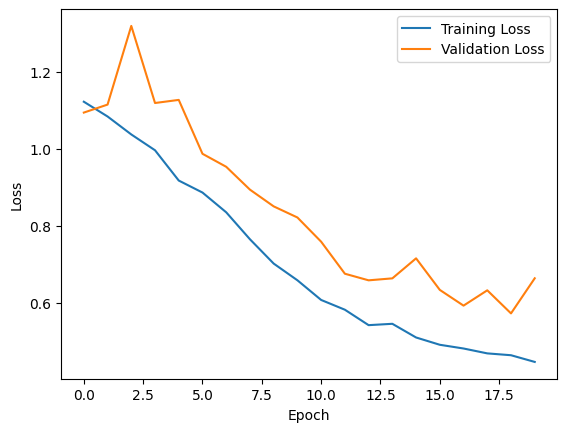

In [ ]:
# Plotagem das curvas de perda (loss) durante o treinamento e validação

# 'history.history' contém informações sobre as métricas do treinamento, incluindo a perda (loss)
# 'history.history['loss']' representa a perda do conjunto de treinamento em cada época
plt.plot(history.history['loss'], label='Training Loss')

# 'history.history['val_loss']' representa a perda do conjunto de validação em cada época
plt.plot(history.history['val_loss'], label='Validation Loss')

# Configuração dos rótulos do gráfico
plt.xlabel('Epoch')  # Eixo x com a etiqueta 'Epoch' (época)
plt.ylabel('Loss')   # Eixo y com a etiqueta 'Loss' (perda)

# Adiciona a legenda ao gráfico para indicar as curvas plotadas
plt.legend()

# Exibe o gráfico
plt.show()

Segundo o gráfico, é possível visualizar como a perda (loss) se comporta ao longo das épocas do treinamento e da validação. sempre esperamos que a curva de perda de treinamento diminua gradualmente à medida que o modelo aprende a partir dos dados de treinamento. Contudo, a curva de perda de validação também deve diminuir, indicando que o modelo está generalizando bem para dados que não foram usados no treinamento.

Se as curvas de perda de treinamento e validação se aproximam à medida que o treinamento prossegue, isso pode indicar um bom ajuste do modelo. No entanto, se a curva de perda de validação começar a aumentar, enquanto a curva de perda de treinamento continua diminuindo, pode ser um sinal de overfitting, o que significa que o modelo está memorizando os dados de treinamento e não está generalizando bem para novos dados.

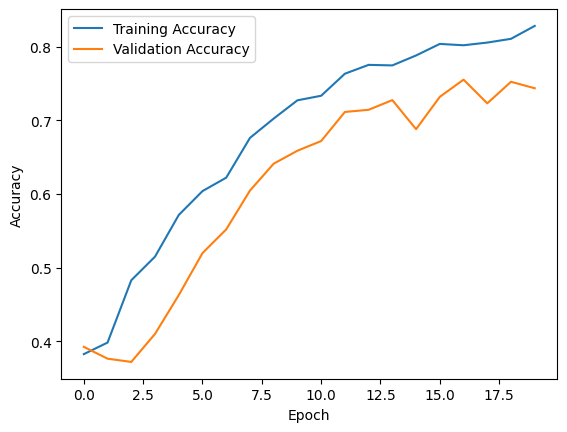

In [ ]:
# Plotagem das curvas de acurácia durante o treinamento e validação

# 'history.history' contém informações sobre as métricas do treinamento, incluindo a acurácia
# 'history.history['Accuracy']' representa a acurácia do conjunto de treinamento em cada época
plt.plot(history.history['Accuracy'], label='Training Accuracy')

# 'history.history['val_Accuracy']' representa a acurácia do conjunto de validação em cada época
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')

# Configuração dos rótulos do gráfico
plt.xlabel('Epoch')  # Eixo x com a etiqueta 'Epoch' (época)
plt.ylabel('Accuracy')   # Eixo y com a etiqueta 'Accuracy' (acurácia)

# Adiciona a legenda ao gráfico para indicar as curvas plotadas
plt.legend()

# Exibe o gráfico
plt.show()

AO visualizar como a acurácia do modelo varia ao longo das épocas durante o treinamento e a validação. Esperamos que a acurácia aumente à medida que o modelo aprende com os dados de treinamento. Ao mesmo tempo, queremos ver se o modelo é capaz de generalizar bem para os dados de validação, o que seria indicado por uma acurácia crescente no conjunto de validação.

O objetivo é que as curvas de acurácia de treinamento e validação se aproximem ou aumentem simultaneamente ao longo das épocas, indicando que o modelo está aprendendo e generalizando adequadamente. Se a acurácia de treinamento continuar a aumentar enquanto a acurácia de validação estagna ou diminui, pode ser um sinal de overfitting, isso pode-se notar apartir da 17º épóca.

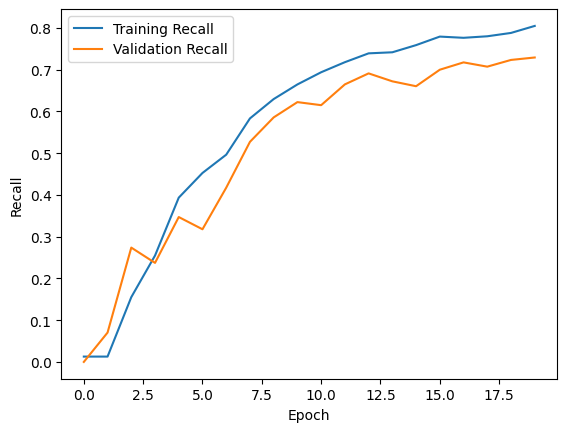

In [ ]:
# Plotagem das curvas de revocação durante o treinamento e validação

# 'history.history' contém informações sobre as métricas do treinamento, incluindo a revocação
# 'history.history['recall']' representa a revocação do conjunto de treinamento em cada época
plt.plot(history.history['recall'], label='Training Recall')

# 'history.history['val_recall']' representa a revocação do conjunto de validação em cada época
plt.plot(history.history['val_recall'], label='Validation Recall')

# Configuração dos rótulos do gráfico
plt.xlabel('Epoch')  # Eixo x com a etiqueta 'Epoch' (época)
plt.ylabel('Recall')   # Eixo y com a etiqueta 'Recall' (revocação)

# Adiciona a legenda ao gráfico para indicar as curvas plotadas
plt.legend()

# Exibe o gráfico
plt.show()

Esse gráfico permite visualizar como a revocação (recall) do modelo varia ao longo das épocas durante o treinamento e a validação. A revocação é uma métrica importante em problemas de classificação, especialmente quando há classes desbalanceadas, como no caso das expressões faciais, onde algumas classes podem ter mais amostras do que outras.

A revocação mede a capacidade do modelo de identificar corretamente todas as amostras de uma classe específica, entre todas as amostras reais dessa classe.

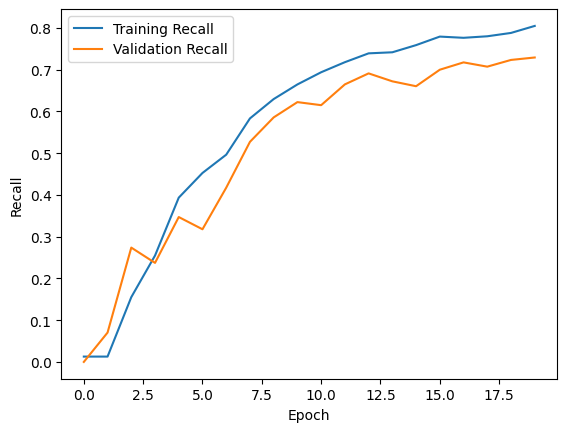

In [ ]:
# Plotagem das curvas de revocação durante o treinamento e validação

# 'history.history' contém informações sobre as métricas do treinamento, incluindo a revocação
# 'history.history['recall']' representa a revocação do conjunto de treinamento em cada época
plt.plot(history.history['recall'], label='Training Recall')

# 'history.history['val_recall']' representa a revocação do conjunto de validação em cada época
plt.plot(history.history['val_recall'], label='Validation Recall')

# Configuração dos rótulos do gráfico
plt.xlabel('Epoch')  # Eixo x com a etiqueta 'Epoch' (época)
plt.ylabel('Recall')   # Eixo y com a etiqueta 'Recall' (revocação)

# Adiciona a legenda ao gráfico para indicar as curvas plotadas
plt.legend()

# Exibe o gráfico
plt.show()

**Modelo salvo para posterior utilização**

In [ ]:
# Importando as bibliotecas necessárias
from google.colab import drive
from datetime import datetime

# Obtendo a data e hora atual
now = datetime.now()

# Definindo o formato de data e hora desejado
formato_hora = '%Y-%m-%dT%H%M'

# Convertendo a data e hora para uma string com o formato especificado
formatted_datetime = now.strftime(formato_hora)

# Montando o Google Drive no ambiente do Colab
drive.mount('/content/drive', force_remount=True)

# Definindo o caminho para o diretório onde o modelo será salvo no Google Drive
save_path = '/content/drive/MyDrive/Pos Ciencia de Dados/Models/'

# Definindo o nome do arquivo do modelo a ser salvo, usando a data e hora formatada
name_model = 'trained_model_' + formatted_datetime + '.h5'

# Salvando o modelo treinado no Google Drive
model.save(save_path + name_model)

# Exibindo mensagem indicando o nome do modelo salvo
print("Modelo salvo com o nome:", name_model)

Mounted at /content/drive
Modelo salvo com o nome: trained_model_2023-07-23T2225.h5


Baixando o Modelo salvo

Local do modelo: https://drive.google.com/file/d/1-AJMXBxjDRI1NdWKQulY914n6vQq0rYN/view?usp=sharing

In [ ]:
# Especificando o ID do arquivo do Google Drive que contém o modelo pré-treinado
file_id = "1-AJMXBxjDRI1NdWKQulY914n6vQq0rYN"

# Construindo a URL do arquivo a ser baixado
url = f"https://drive.google.com/uc?id={file_id}"

# Especificando a pasta onde o arquivo será baixado
folder_path = "."  # Neste caso, a pasta atual (current directory) será usada como destino

# Criando a pasta de destino se necessário
os.makedirs(folder_path, exist_ok=True)

# Especificando o caminho completo e o nome do arquivo onde o modelo será salvo
output = "/content/drive/MyDrive/data/trained_model_2023-07-23T2225.h5"

# Baixando o arquivo do Google Drive usando o link especificado
gdown.download(url, output)

# Definindo o caminho para o arquivo do modelo pré-treinado que foi baixado
model_path = "/content/drive/MyDrive/data/trained_model_2023-07-23T2225.h5"

# Carregando o modelo a partir do arquivo baixado
loaded_model = load_model(model_path)

# Exibindo mensagem indicando que o modelo foi carregado com sucesso
print(f"Model {output} loaded successfully.")

Downloading...
From: https://drive.google.com/uc?id=1-AJMXBxjDRI1NdWKQulY914n6vQq0rYN
To: /content/drive/MyDrive/data/trained_model_2023-07-23T2225.h5
100%|██████████| 118M/118M [00:01<00:00, 81.0MB/s]


Model /content/drive/MyDrive/data/trained_model_2023-07-23T2225.h5 loaded successfully.


Rodar o modelo no partição teste

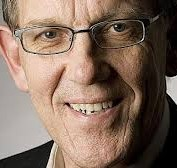

1/1 [==============================] - 0s 247ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.83304447




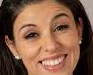

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9904889




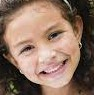

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9910183




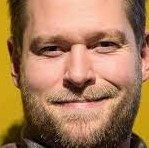

1/1 [==============================] - 0s 61ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9536191




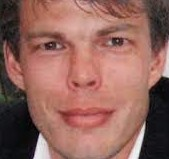

1/1 [==============================] - 0s 60ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9429711




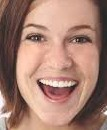

1/1 [==============================] - 0s 69ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9815652




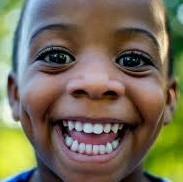

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99567634




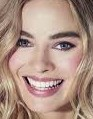

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9925339




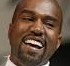

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.96067905




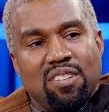

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.659391




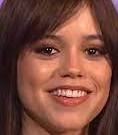

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9875141




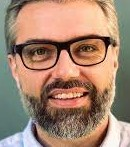

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9127582




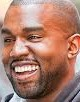

1/1 [==============================] - 0s 66ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.93922234




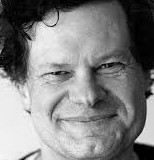

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6224219




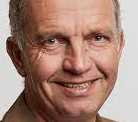

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9732704




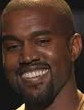

1/1 [==============================] - 0s 58ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.49231845




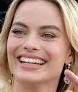

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.98373425




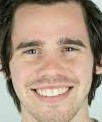

1/1 [==============================] - 0s 51ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9974644




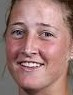

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9842726




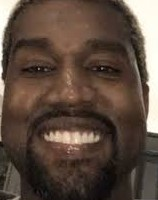

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.939449




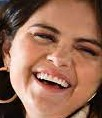

1/1 [==============================] - 0s 59ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9932808




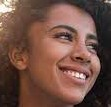

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9006176




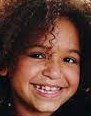

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9871553




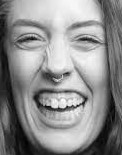

1/1 [==============================] - 0s 59ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8743337




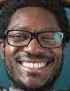

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99335396




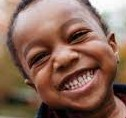

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9503656




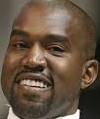

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9316116




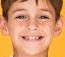

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.90563




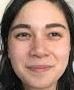

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6244448




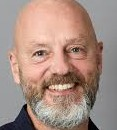

1/1 [==============================] - 0s 58ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.78719795




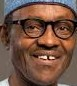

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9503194




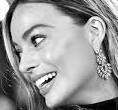

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.91179204




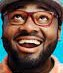

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9158872




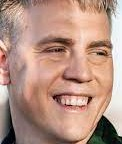

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.995182




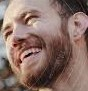

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9738255




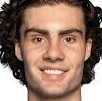

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9893828




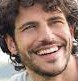

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9886241




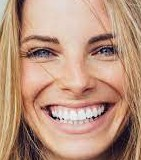

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99610573




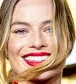

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9933015




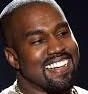

1/1 [==============================] - 0s 61ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99641645




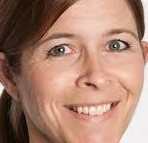

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99382126




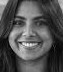

1/1 [==============================] - 0s 71ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9356821




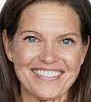

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99478817




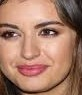

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6737509




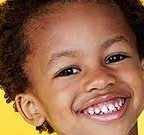

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9856544




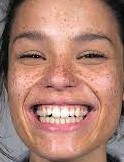

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99769235




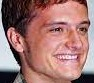

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9612123




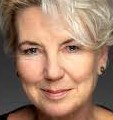

1/1 [==============================] - 0s 51ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9339626




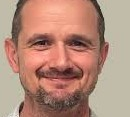

1/1 [==============================] - 0s 58ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6929262




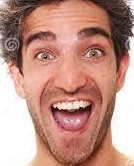

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9480063




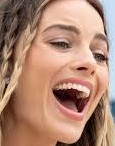

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9812382




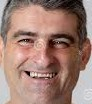

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.98569655




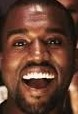

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9785098




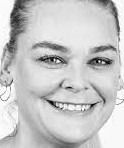

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.90310264




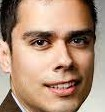

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.95869315




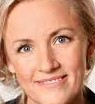

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97035134




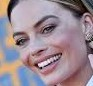

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9914397




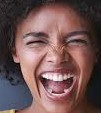

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97153395




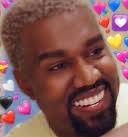

1/1 [==============================] - 0s 62ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99140394




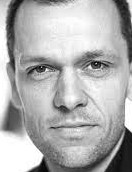

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.62276155




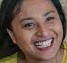

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9927989




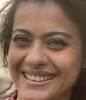

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.89234143




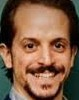

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8719537




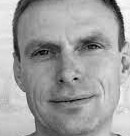

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.68123543




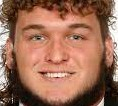

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9602681




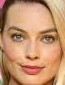

1/1 [==============================] - 0s 58ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6628993




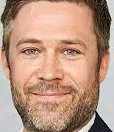

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6093093




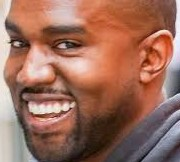

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.91321874




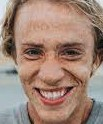

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97047734




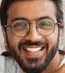

1/1 [==============================] - 0s 51ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9805534




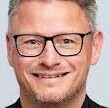

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.98466164




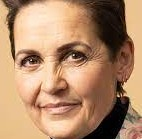

1/1 [==============================] - 0s 59ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.79907227




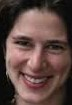

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.81579477




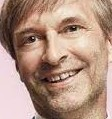

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.93605995




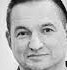

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.782509




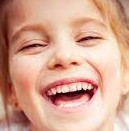

1/1 [==============================] - 0s 62ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97823846




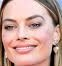

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7734685




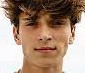

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9063231




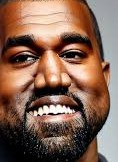

1/1 [==============================] - 0s 54ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9960926




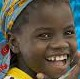

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9818202




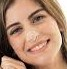

1/1 [==============================] - 0s 55ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9714813




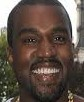

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97428304




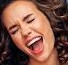

1/1 [==============================] - 0s 83ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.44492075




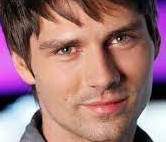

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.89476144




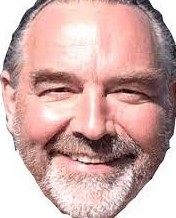

1/1 [==============================] - 0s 86ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9198827




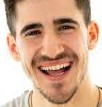

1/1 [==============================] - 0s 98ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9234423




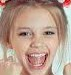

1/1 [==============================] - 0s 89ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9285144




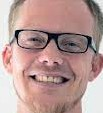

1/1 [==============================] - 0s 114ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8065112




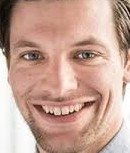

1/1 [==============================] - 0s 103ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97777516




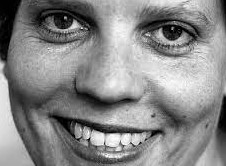

1/1 [==============================] - 0s 99ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9373572




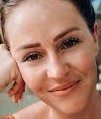

1/1 [==============================] - 0s 89ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9058893




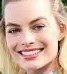

1/1 [==============================] - 0s 105ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9433549




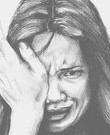

1/1 [==============================] - 0s 79ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.97682583




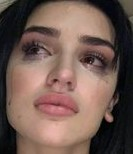

1/1 [==============================] - 0s 97ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6664762




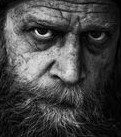

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7680244




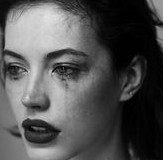

1/1 [==============================] - 0s 104ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.51328295




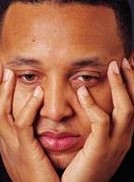

1/1 [==============================] - 0s 84ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9019864




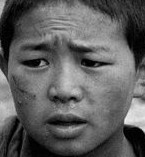

1/1 [==============================] - 0s 85ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.84567314




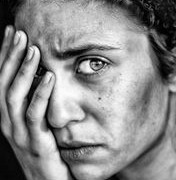

1/1 [==============================] - 0s 102ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8952562




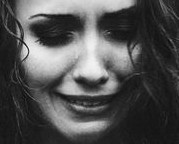

1/1 [==============================] - 0s 115ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9621805




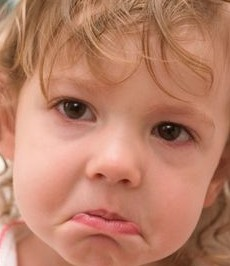

1/1 [==============================] - 0s 105ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.87333703




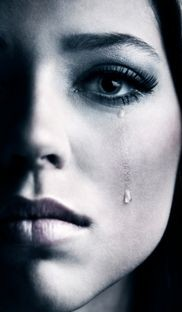

1/1 [==============================] - 0s 105ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.98938364




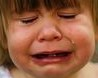

1/1 [==============================] - 0s 110ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.75768936




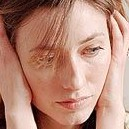

1/1 [==============================] - 0s 115ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9705199




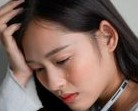

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9902322




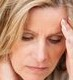

1/1 [==============================] - 0s 106ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.84202945




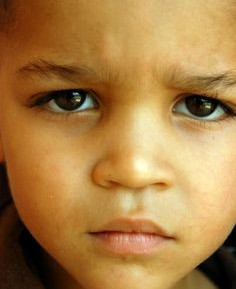

1/1 [==============================] - 0s 106ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5275368




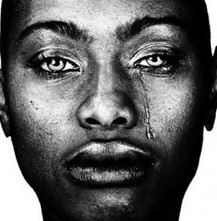

1/1 [==============================] - 0s 86ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.66942984




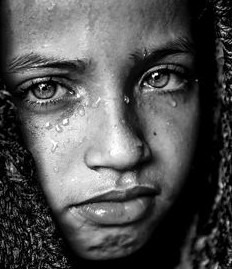

1/1 [==============================] - 0s 103ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.49689147




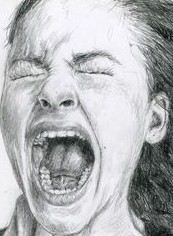

1/1 [==============================] - 0s 85ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.84611136




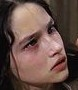

1/1 [==============================] - 0s 82ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.7277684




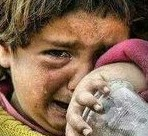

1/1 [==============================] - 0s 58ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.51509446




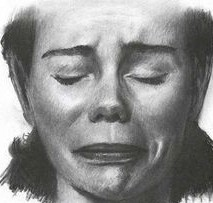

1/1 [==============================] - 0s 56ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8217488




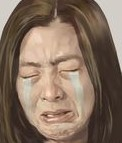

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9766286




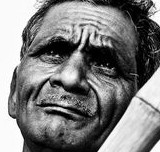

1/1 [==============================] - 0s 52ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.7455842




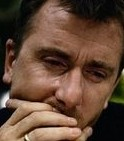

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.58281136




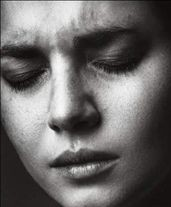

1/1 [==============================] - 0s 57ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.74381673




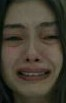

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.79197925




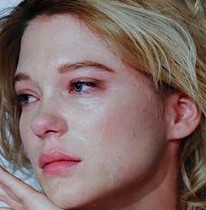

1/1 [==============================] - 0s 62ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.89752847




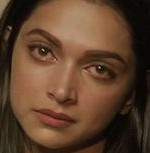

1/1 [==============================] - 0s 61ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6960595




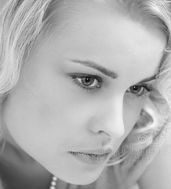

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.86253613




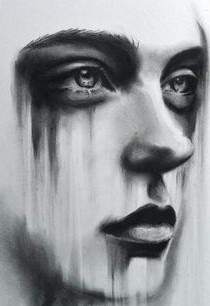

1/1 [==============================] - 0s 60ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8941423




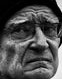

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.62033063




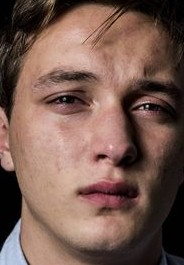

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5817088




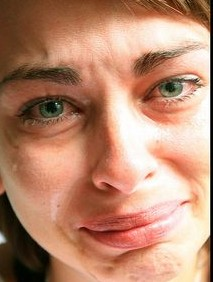

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.84644383




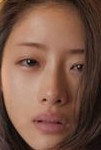

1/1 [==============================] - 0s 64ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.94162494




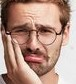

1/1 [==============================] - 0s 73ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5248086




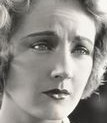

1/1 [==============================] - 0s 64ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9437719




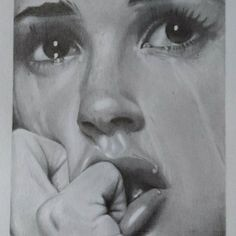

1/1 [==============================] - 0s 67ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.7939165




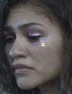

1/1 [==============================] - 0s 77ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6490044




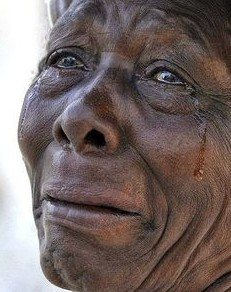

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8625149




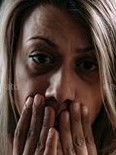

1/1 [==============================] - 0s 62ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9271991




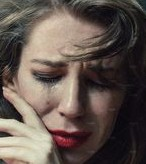

1/1 [==============================] - 0s 59ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.93799245




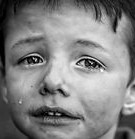

1/1 [==============================] - 0s 78ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.51563233




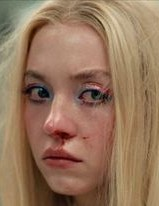

1/1 [==============================] - 0s 53ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.91819507




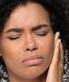

1/1 [==============================] - 0s 70ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.631628




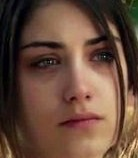

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9514291




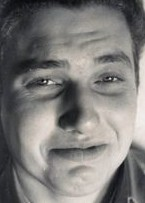

1/1 [==============================] - 0s 64ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6950768




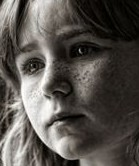

1/1 [==============================] - 0s 66ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9224431




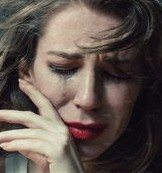

1/1 [==============================] - 0s 61ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.73014414




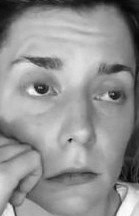

1/1 [==============================] - 0s 69ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.44983888




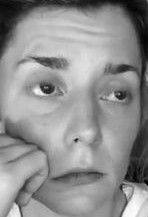

1/1 [==============================] - 0s 84ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.53366905




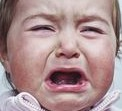

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9572186




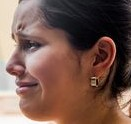

1/1 [==============================] - 0s 74ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.92092174




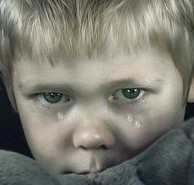

1/1 [==============================] - 0s 65ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.83694154




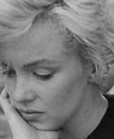

1/1 [==============================] - 0s 60ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9017807




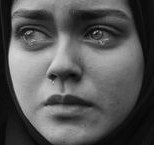

1/1 [==============================] - 0s 66ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9440945




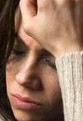

1/1 [==============================] - 0s 63ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6289054




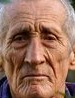

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.76144207




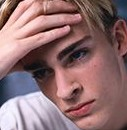

1/1 [==============================] - 0s 72ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6836335




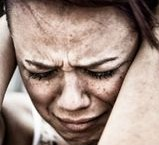

1/1 [==============================] - 0s 141ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8237321




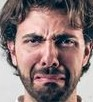

1/1 [==============================] - 0s 136ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5557754




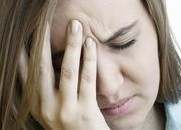

1/1 [==============================] - 0s 100ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8826989




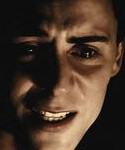

1/1 [==============================] - 0s 109ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9304328




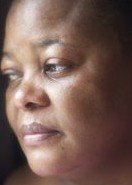

1/1 [==============================] - 0s 158ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.63149226




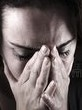

1/1 [==============================] - 0s 118ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9592799




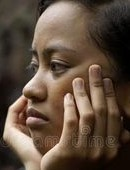

1/1 [==============================] - 0s 154ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6499509




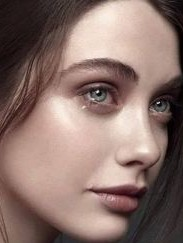

1/1 [==============================] - 0s 105ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9084319




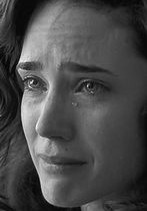

1/1 [==============================] - 0s 169ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.49766055




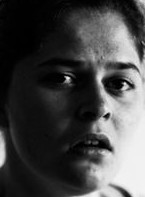

1/1 [==============================] - 0s 144ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6040059




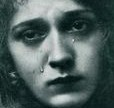

1/1 [==============================] - 0s 109ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7244288




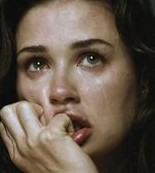

1/1 [==============================] - 0s 159ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.8220951




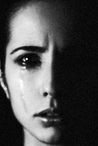

1/1 [==============================] - 0s 133ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9754778




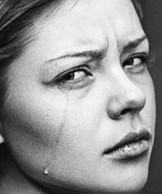

1/1 [==============================] - 0s 148ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.74970645




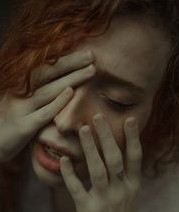

1/1 [==============================] - 0s 108ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6244117




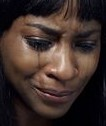

1/1 [==============================] - 0s 117ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.542667




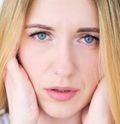

1/1 [==============================] - 0s 169ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8521196




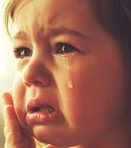

1/1 [==============================] - 0s 169ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5726761




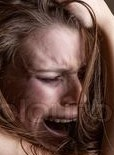

1/1 [==============================] - 0s 163ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6390156




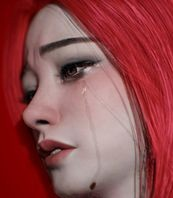

1/1 [==============================] - 0s 198ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.8089788




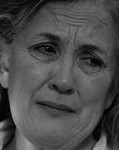

1/1 [==============================] - 0s 154ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7001215




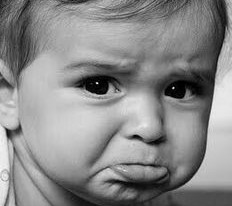

1/1 [==============================] - 0s 189ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5131542




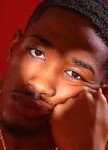

1/1 [==============================] - 0s 324ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6177019




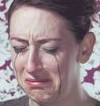

1/1 [==============================] - 0s 284ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.87829435




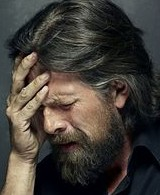

1/1 [==============================] - 0s 238ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.963295




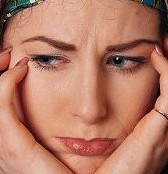

1/1 [==============================] - 0s 113ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.8084287




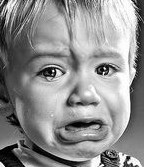

1/1 [==============================] - 0s 111ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9191333




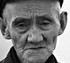

1/1 [==============================] - 0s 110ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.58540046




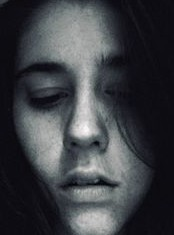

1/1 [==============================] - 0s 95ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9578171




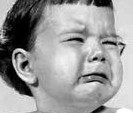

1/1 [==============================] - 0s 117ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9944885




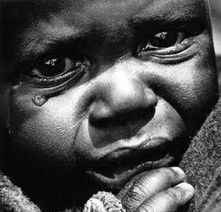

1/1 [==============================] - 0s 107ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9295389




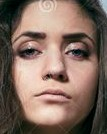

1/1 [==============================] - 0s 123ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.65082556




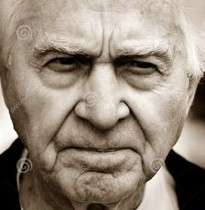

1/1 [==============================] - 0s 106ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.69208616




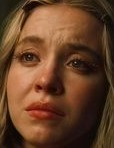

1/1 [==============================] - 0s 135ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.79543656




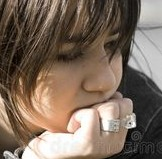

1/1 [==============================] - 0s 108ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.93434465




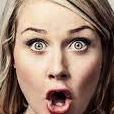

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9946083




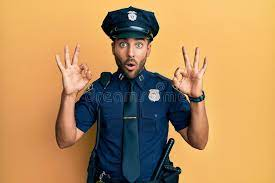

1/1 [==============================] - 0s 85ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.99198896




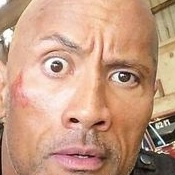

1/1 [==============================] - 0s 61ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.7732317




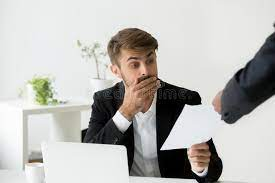

1/1 [==============================] - 0s 78ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.3782827




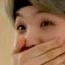

1/1 [==============================] - 0s 84ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.61119086




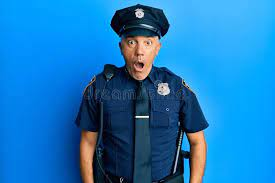

1/1 [==============================] - 0s 82ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.58320814




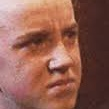

1/1 [==============================] - 0s 82ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.87824804




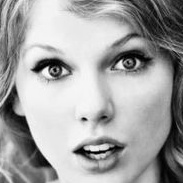

1/1 [==============================] - 0s 78ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.52427745




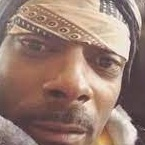

1/1 [==============================] - 0s 76ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9421498




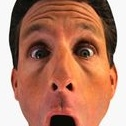

1/1 [==============================] - 0s 94ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.40345472




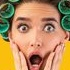

1/1 [==============================] - 0s 80ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.93095136




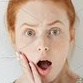

1/1 [==============================] - 0s 72ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.6291353




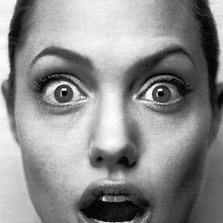

1/1 [==============================] - 0s 87ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.97396594




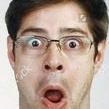

1/1 [==============================] - 0s 94ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.99235755




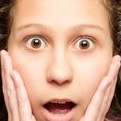

1/1 [==============================] - 0s 82ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9545353




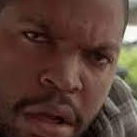

1/1 [==============================] - 0s 95ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7475109




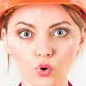

1/1 [==============================] - 0s 79ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.98156077




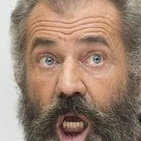

1/1 [==============================] - 0s 84ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.7000118




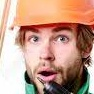

1/1 [==============================] - 0s 89ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.7104608




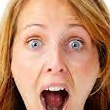

1/1 [==============================] - 0s 83ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.98164785




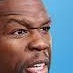

1/1 [==============================] - 0s 88ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5213291




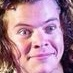

1/1 [==============================] - 0s 93ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.49001265




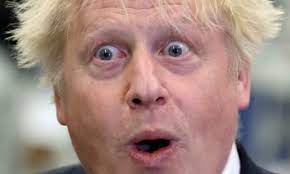

1/1 [==============================] - 0s 84ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.8671354




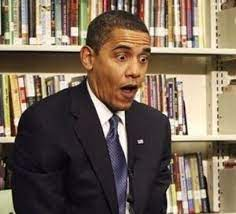

1/1 [==============================] - 0s 81ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5404835




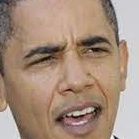

1/1 [==============================] - 0s 86ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9143108




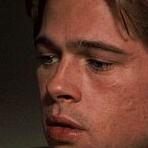

1/1 [==============================] - 0s 80ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.98046964




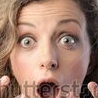

1/1 [==============================] - 0s 83ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9358446




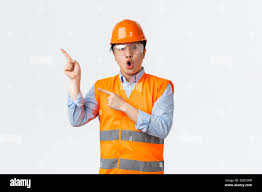

1/1 [==============================] - 0s 91ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6882273




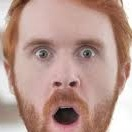

1/1 [==============================] - 0s 99ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.982177




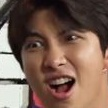

1/1 [==============================] - 0s 87ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5585455




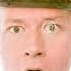

1/1 [==============================] - 0s 86ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.92104673




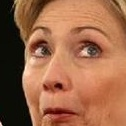

1/1 [==============================] - 0s 116ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5195397




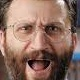

1/1 [==============================] - 0s 117ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.52790844




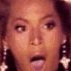

1/1 [==============================] - 0s 122ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.75177515




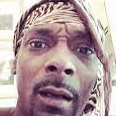

1/1 [==============================] - 0s 137ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9070913




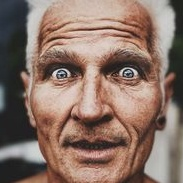

1/1 [==============================] - 0s 147ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9586147




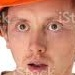

1/1 [==============================] - 0s 136ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.56184757




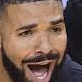

1/1 [==============================] - 0s 112ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.59430057




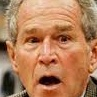

1/1 [==============================] - 0s 132ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.86577487




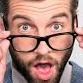

1/1 [==============================] - 0s 106ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9149286




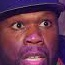

1/1 [==============================] - 0s 118ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5009223




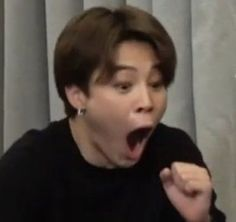

1/1 [==============================] - 0s 142ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.80917656




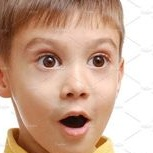

1/1 [==============================] - 0s 126ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9418037




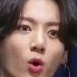

1/1 [==============================] - 0s 118ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.60167366




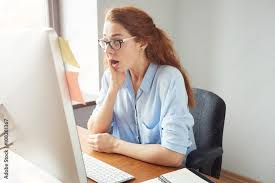

1/1 [==============================] - 0s 132ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.98997074




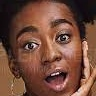

1/1 [==============================] - 0s 103ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.5876618




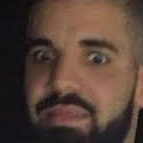

1/1 [==============================] - 0s 108ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9215309




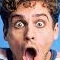

1/1 [==============================] - 0s 122ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.99194795




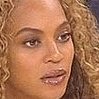

1/1 [==============================] - 0s 90ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.94265014




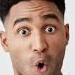

1/1 [==============================] - 0s 87ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.96275514




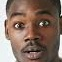

1/1 [==============================] - 0s 113ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.6396644




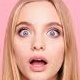

1/1 [==============================] - 0s 129ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.7760742




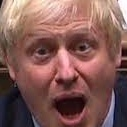

1/1 [==============================] - 0s 132ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.64180726




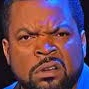

1/1 [==============================] - 0s 124ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.5647977




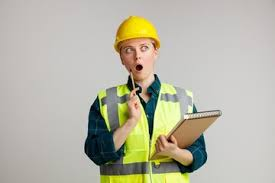

1/1 [==============================] - 0s 110ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.58515567




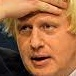

1/1 [==============================] - 0s 141ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.79988456




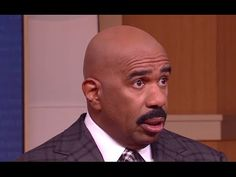

1/1 [==============================] - 0s 143ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9477687




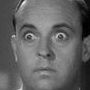

1/1 [==============================] - 0s 145ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.8579367




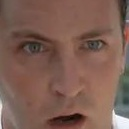

1/1 [==============================] - 0s 150ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.48865166




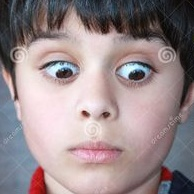

1/1 [==============================] - 0s 141ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9188275




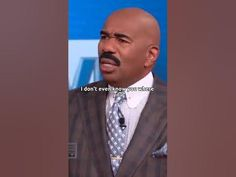

1/1 [==============================] - 0s 104ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.69561833




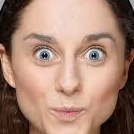

1/1 [==============================] - 0s 123ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9854255




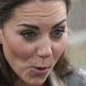

1/1 [==============================] - 0s 129ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.86337227




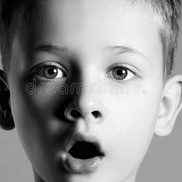

1/1 [==============================] - 0s 86ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.6659072




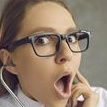

1/1 [==============================] - 0s 88ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.4598822




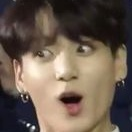

1/1 [==============================] - 0s 132ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.71522236




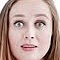

1/1 [==============================] - 0s 177ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.57042235




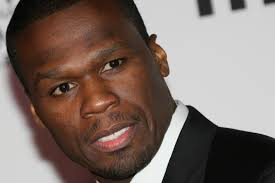

1/1 [==============================] - 0s 135ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.9205634




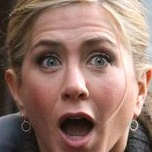

1/1 [==============================] - 0s 100ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.5608701




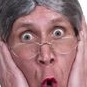

1/1 [==============================] - 0s 119ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9913352




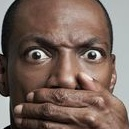

1/1 [==============================] - 0s 123ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.97128165




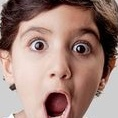

1/1 [==============================] - 0s 135ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.9948323




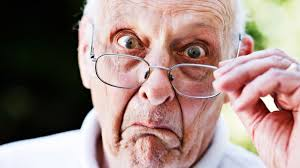

1/1 [==============================] - 0s 92ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.76499516




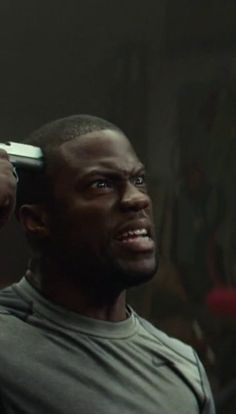

1/1 [==============================] - 0s 138ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.9303642




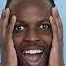

1/1 [==============================] - 0s 116ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.96171784




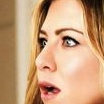

1/1 [==============================] - 0s 117ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: sad
Probabilidade: 0.61798376




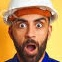

1/1 [==============================] - 0s 127ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.55514884




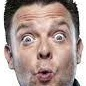

1/1 [==============================] - 0s 156ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: surprise
Probabilidade: 0.96887946




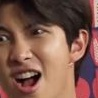

1/1 [==============================] - 0s 103ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.85059965




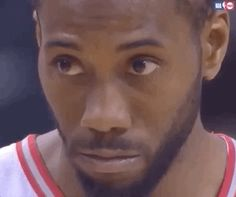

1/1 [==============================] - 0s 150ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.64158136




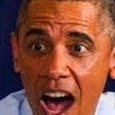

1/1 [==============================] - 0s 146ms/step
Label (Classe verdadeira): Face Expressions (Happy, Sad, Surprise)
Previsão: happy
Probabilidade: 0.6722027




In [ ]:
# Importando as bibliotecas necessárias
from tensorflow.keras.preprocessing import image

# Pasta principal que contém as pastas de cada classe nas quais as imagens de teste estão armazenadas
parent_dir = '/content/Face Expressions (Happy, Sad, Surprise)/test'

# Contador para o número total de imagens de teste
count_images = 0

# Nomes das classes
class_names = ['happy', 'sad', 'surprise']

# Listas para armazenar as previsões do modelo e as classes verdadeiras das imagens
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(parent_dir):

    for file in files:

        # Verificando se o arquivo é uma imagem (.png ou .jpg)
        if file.endswith('.png') or file.endswith('.jpg'):
            count_images += 1

            # Obtendo o rótulo (classe verdadeira) da imagem a partir do caminho do arquivo
            split_path = os.path.join(subdir, file).split('/')
            label = split_path[2]
            y_true.append(label)

            # Caminho completo para a imagem
            img_path = os.path.join(subdir, file)

            # Exibindo a imagem
            display(ipimg(filename=img_path, width=300))

            # Carregando e redimensionando a imagem para o tamanho esperado pelo modelo
            img = image.load_img(img_path, target_size=(224, 224))

            # Convertendo a imagem para um array numpy
            x = image.img_to_array(img)

            # Expandindo as dimensões do array para se adequar ao formato de entrada do modelo
            x = np.expand_dims(x, axis=0)

            # Normalizando os valores dos pixels para o intervalo [0, 1]
            x = x.astype('float32') / 255.0

            # Realizando a previsão usando o modelo carregado
            prediction = loaded_model.predict(x)

            # Obtendo a classe prevista pelo modelo
            predicted_class = np.argmax(prediction[0])

            # Obtendo a probabilidade associada à previsão
            probability = prediction[0][predicted_class]

            # Armazenando a classe prevista e a probabilidade nas listas correspondentes
            y_pred.append(class_names[predicted_class])

            # Imprimindo as informações da previsão
            print("Label (Classe verdadeira):", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")

# Resultados

Confusion matrix, without normalization


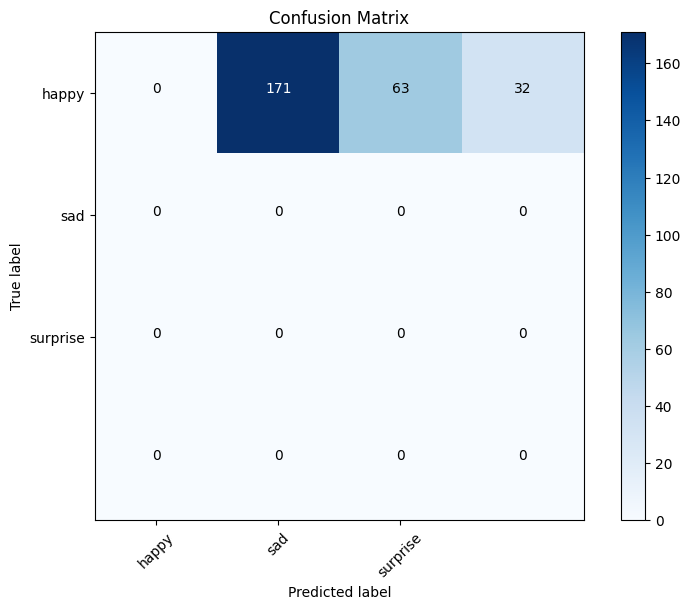

In [ ]:
# Convertendo as listas de previsões e rótulos verdadeiros em arrays numpy
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Calculando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Plotando a matriz de confusão como uma imagem
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Adicionando os valores numéricos dentro de cada célula da matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Definindo o tamanho da figura para o plot da matriz de confusão
plt.figure(figsize=(8, 6))

# Chamando a função para plotar a matriz de confusão
plot_confusion_matrix(cm, classes=['happy', 'sad', 'surprise'], normalize=False, title='Confusion Matrix')

# Mostrando o plot da matriz de confusão
plt.show()

A analise da acurácia ficou prejudicada pois não foi possivel ter uma diagonal na matriz de confusão impossibilitando mediar a acurácia, de igual maneira o Recall, Não será reavaliado o modelo por razão de eminencia da entrega do trabalho. (Vencedor até aqui :)) a seguir os indicadores confirmando o teste da matriz de confusão.



In [ ]:
# Calculando a acurácia do modelo
accuracy = skm.accuracy_score(y_true, y_pred)

# Calculando a precisão do modelo para cada classe individual
precision = skm.precision_score(y_true, y_pred, average=None)

# Calculando a revocação (recall) do modelo para cada classe individual
recall = skm.recall_score(y_true, y_pred, average=None)

# Calculando o F1-Score do modelo, que é a média ponderada da precisão e recall
f1score = skm.f1_score(y_true, y_pred, average='weighted')

# Imprimindo as métricas calculadas
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.0
Precision:  [0. 0. 0. 0.]
Recall:  [0. 0. 0. 0.]
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Concluido o modelo não foi eficaz ao que propusermos no escopo do trabalho, porem com mais tempo repetiremos este projeto  incrementando o numeros de epócas do modelo, entre outros ajustes pertinentes